# FINAL PROJECT- Predicting Subscription

To effectively predict term deposit subscriptions and improve marketing strategies in the competitive financial services sector, we'll gather and clean comprehensive customer and campaign data. Through in-depth analysis, we'll identify key features and create new ones to capture customer behavior. Using machine learning models, we'll predict subscription likelihood, evaluating and refining models for accuracy. Insights gained will inform tailored marketing approaches. Continuous monitoring and adaptation will ensure ongoing effectiveness.
 
- This dataset is originally from the [**UCI machine learning repository**](https://archive.ics.uci.edu/dataset/222/bank+marketing). The full description of the attributes of the dataset, readme file and presentation will be provided in the github repository [**Final-Project-LHL**](https://github.com/minaotros92/Final_Project-_LHL).

<h3> Dataset Description </h3>
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

__Attribute/Features Description:__  
Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.  
* __bank client attributes__:
    * age: age of client (numeric)   
    * job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")   
    * marital : marital status (categorical: "married", "divorced", "single")  
    * education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")
    * default: has credit in default? (binary/2-categories: "yes", "no")
    * balance: average yearly balance, in euros (numeric)  
    * housing: has housing loan? (binary/2-categories: "yes", "no")  
    * loan: has personal loan? (binary/2-categories: "yes", "no")  
* __related with the last contact of the current campaign__:
    * contact: contact communication type (categorical: "unknown", "telephone", "cellular") 
    * day: last contact day of the month (numeric)
    * month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    * duration: last contact duration, in seconds (numeric)
* __other attributes__:
    * campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    * pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
    * previous: number of contacts performed before this campaign and for this client (numeric)
    * poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")
* __Output variable (desired target)__:
    * y: has the client subscribed a term deposit? (binary: "yes", "no")

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome.

#### Possible hypotheses

1- Age and Subscription Hypothesis:
Does a customer's age predict the likelihood of subscribing to a term deposit?

2- Job Type and Subscription Hypothesis:
Is there a predictive relationship between a customer's job type and their decision to subscribe to a term deposit?

3- Marital Status and Subscription Hypothesis:
Can marital status be used as a predictor for subscription to the bank's services?

4- Education and Subscription Hypothesis:
Does the level of education have a predictive power regarding subscription rates?

5- Credit Default and Subscription Hypothesis:
Is having a credit default a good predictor of whether a customer will not subscribe to a term deposit?

6-Average Yearly Balance and Subscription Hypothesis:
Can the average yearly balance predict the likelihood of a term deposit subscription?

7- Housing Loan and Subscription Hypothesis:
Is there a relationship between having a housing loan and the probability of subscribing to a term deposit?

8- Personal Loan and Subscription Hypothesis:
Does having a personal loan negatively predict the likelihood of subscribing to a term deposit?

9- Contact Communication Type and Subscription Hypothesis:
Is the method of contact (e.g., cellular, telephone) a predictor of successful subscription?

10- Contact Day and Month and Subscription Hypothesis:
Do the day and month of the last contact have predictive power over subscription success?

11- Last Contact Duration and Subscription Hypothesis:
Is the duration of the last contact a strong predictor of a customer's decision to subscribe?

12- Number of Contacts in Campaign and Subscription Hypothesis:
Does the number of contacts during the current campaign predict subscription rates?

13- Days Since Last Campaign Contact and Subscription Hypothesis:
Is the number of days that have passed since the last campaign contact predictive of subscription likelihood?

14- Previous Campaign Contacts and Subscription Hypothesis:
Can the number of contacts before the current campaign predict the outcome of the current campaign?


# Part I: EDA & Data Cleaning/Polishing

In [4]:
! pip install matplotlib --upgrade


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Corrected file path with forward slashes
df = pd.read_csv("C:/Final Project/Final Project/Data/bank-full.csv")

In [6]:
# Let's check the shape first
df.shape

(45211, 17)

In [7]:
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [8]:
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


    Our dataset do not have any null/nan/missing values.

In [10]:
df.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

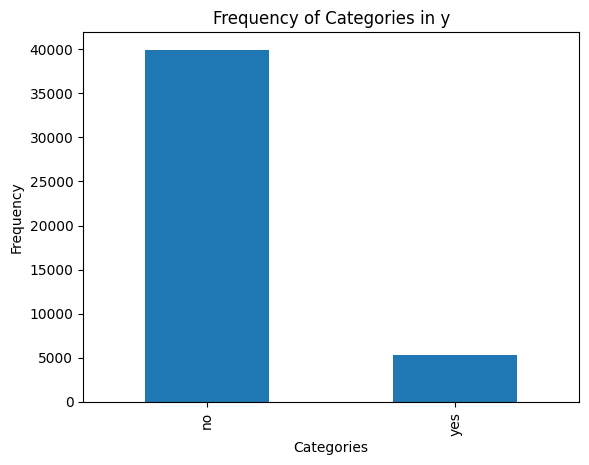

In [11]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'y' is the column of interest
value_counts = df['y'].value_counts()

# Creating a bar plot
value_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in y')
plt.show()


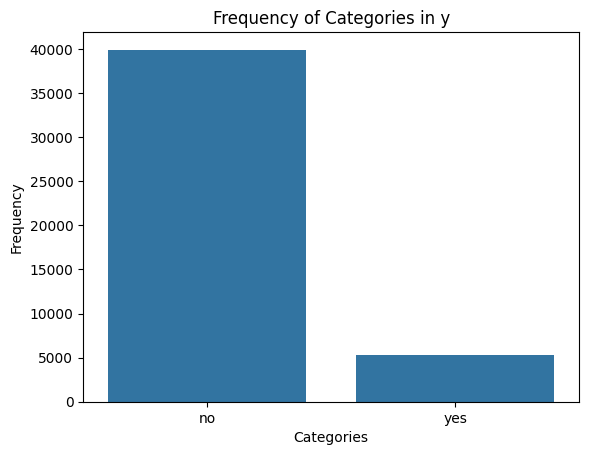

In [12]:
import seaborn as sns

# Assuming 'df' is your DataFrame and 'y' is the column of interest
value_counts = df['y'].value_counts().reset_index()
value_counts.columns = ['y', 'counts']  # Renaming columns for clarity

# Creating a bar plot
sns.barplot(x='y', y='counts', data=value_counts)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in y')
plt.show()


Text(0.5, 0, 'Target class')

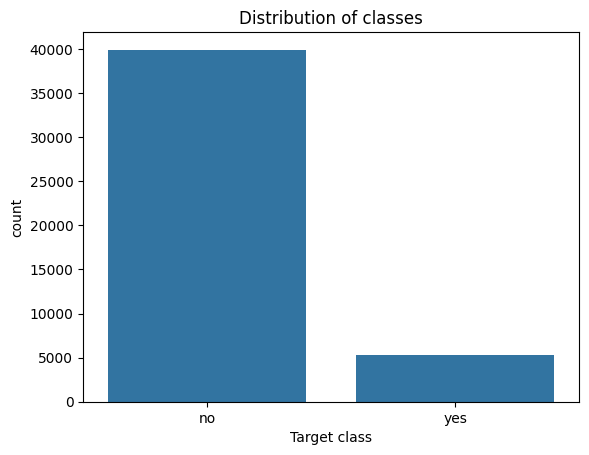

In [13]:
from matplotlib import pyplot as plt
sns.countplot(x=df['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

__Observation:__  
Our dataset is highly imbalanced.

In [14]:
# Summary of the numerical features:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


<h4> pdays </h4>

In [15]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, df.pdays.quantile(x/100)))
iqr = df.pdays.quantile(0.75) - df.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 317.0
96% of pdays are less than equal to 337.0
97% of pdays are less than equal to 349.0
98% of pdays are less than equal to 360.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


__Observation:__  
* The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
* 75% clients contacted through campaign are not previously contacted.
* Mean of pdays is 40.20
* There are outliers as we can see from boxplot.

In [16]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, df.duration.quantile(x/100)))
iqr = df.duration.quantile(0.75) - df.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 751.0
96% of calls have duration less than equal to 823.0
97% of calls have duration less than equal to 914.6999999999971
98% of calls have duration less than equal to 1051.0
99% of calls have duration less than equal to 1269.0
100% of calls have duration less than equal to 4918.0
IQR 216.0


__Observation:__  
* The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.
* 75% call duration are less than or equal to 5.32
* duration have a mean of 4.30 and standard-deviation 4.29
* There are outliers points in duration.

<h4> duration </h4>

Text(0.5, 0, 'y:target variable')

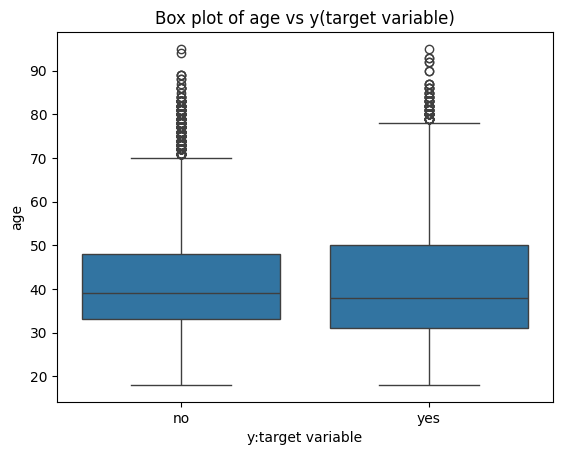

In [17]:
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

In [18]:
lst = [df]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [19]:
count_age_response_pct = pd.crosstab(df['y'],df['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

<Axes: xlabel='age_group', ylabel='count'>

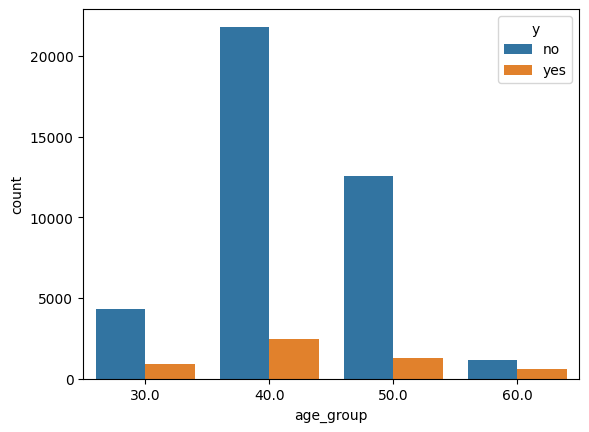

In [20]:
sns.countplot(x='age_group', data=df, hue='y')

In [21]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 30]), df[df['age_group'] == 30].y.value_counts()[1]/len(df[df['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 40]), df[df['age_group'] == 40].y.value_counts()[1]/len(df[df['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 50]), df[df['age_group'] == 50].y.value_counts()[1]/len(df[df['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(df[df['age_group'] == 60]), df[df['age_group'] == 60].y.value_counts()[1]/len(df[df['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients of age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients of age 40-60 contacted: 13880, Success rate: 0.09402017291066282
Clients of 60+ age contacted: 1784, Success rate: 0.336322869955157


__Observation:__  
* People with age < 30 or 60+ have higher success rate.  
* Only 3% of clients have age of 60+ 

  <h4> jobs </h4>

In [22]:
df.job.value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

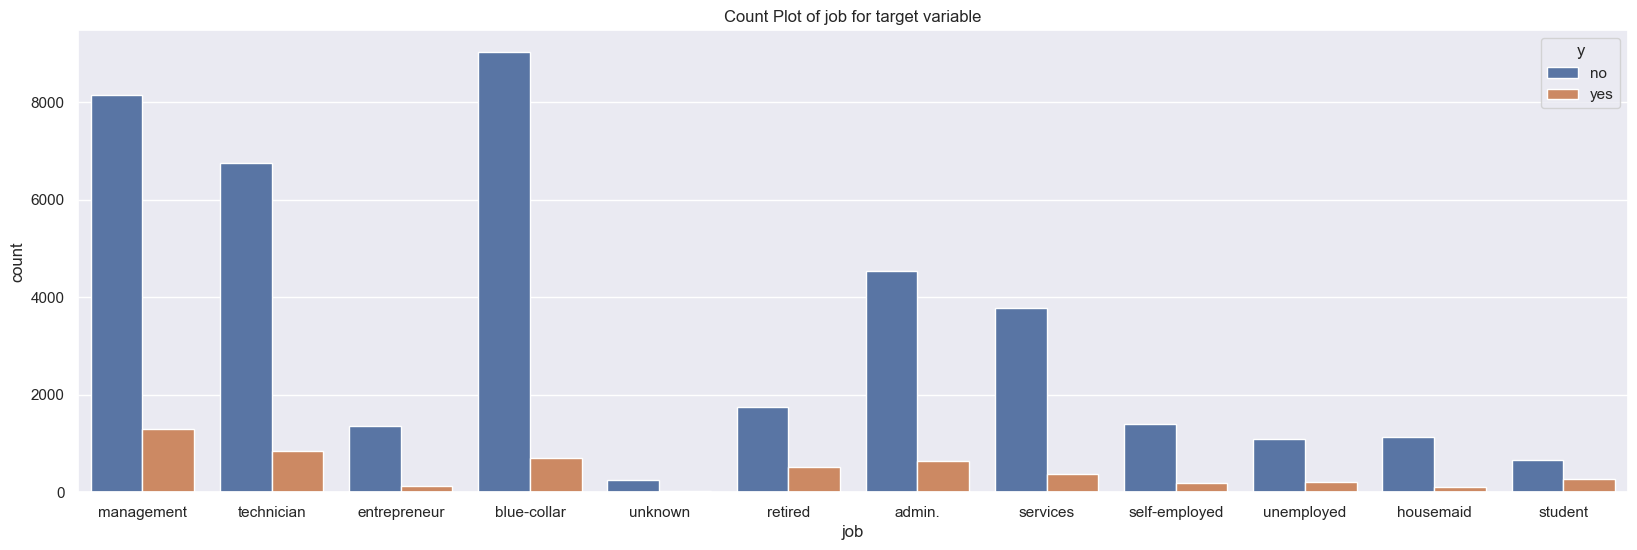

In [23]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=df['job'], data=df, hue=df['y'])
plt.title('Count Plot of job for target variable')

In [24]:
! pip install PrettyTable
from prettytable import PrettyTable



In [25]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(df[df['job'] == 'blue-collar']), df[df['job'] == 'blue-collar'].y.value_counts()[1]/len(df[df['job'] == 'blue-collar'])])
table.add_row(['Management', len(df[df['job'] == 'management']), df[df['job'] == 'management'].y.value_counts()[1]/len(df[df['job'] == 'management'])])
table.add_row(['Technician', len(df[df['job'] == 'technician']), df[df['job'] == 'technician'].y.value_counts()[1]/len(df[df['job'] == 'technician'])])
table.add_row(['Admin', len(df[df['job'] == 'admin.']), df[df['job'] == 'admin.'].y.value_counts()[1]/len(df[df['job'] == 'admin.'])])
table.add_row(['Services', len(df[df['job'] == 'services']), df[df['job'] == 'services'].y.value_counts()[1]/len(df[df['job'] == 'services'])])
table.add_row(['Retired', len(df[df['job'] == 'retired']), df[df['job'] == 'retired'].y.value_counts()[1]/len(df[df['job'] == 'retired'])])
table.add_row(['Self-employed', len(df[df['job'] == 'self-employed']), df[df['job'] == 'self-employed'].y.value_counts()[1]/len(df[df['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(df[df['job'] == 'entrepreneur']), df[df['job'] == 'entrepreneur'].y.value_counts()[1]/len(df[df['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(df[df['job'] == 'unemployed']), df[df['job'] == 'unemployed'].y.value_counts()[1]/len(df[df['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(df[df['job'] == 'housemaid']), df[df['job'] == 'housemaid'].y.value_counts()[1]/len(df[df['job'] == 'housemaid'])])
table.add_row(['Student', len(df[df['job'] == 'student']), df[df['job'] == 'student'].y.value_counts()[1]/len(df[df['job'] == 'student'])])
table.add_row(['Unknown', len(df[df['job'] == 'unknown']), df[df['job'] == 'unknown'].y.value_counts()[1]/len(df[df['job'] == 'unknown'])])
print(table)


+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


__Observation:__  
* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
* Success rate is highest for student

<h4> education </h4>

In [26]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable y')

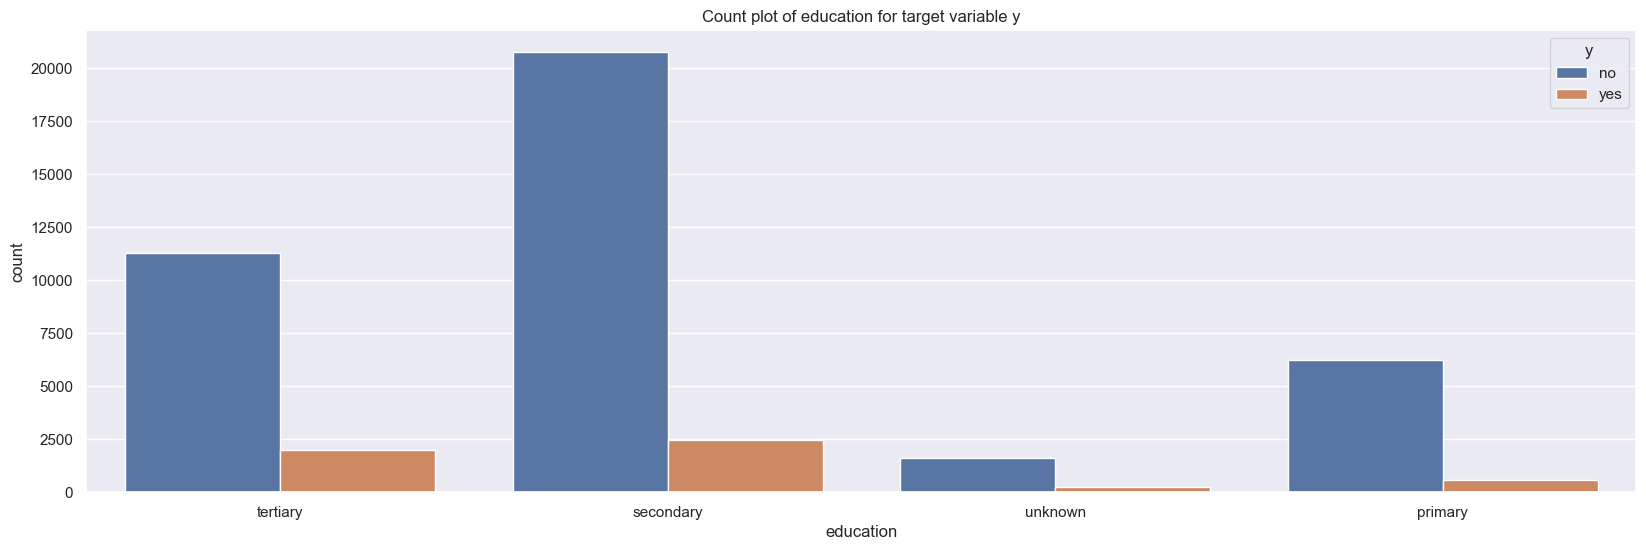

In [27]:
sns.countplot(x=df['education'], data=df, hue=df['y'])
plt.title('Count plot of education for target variable y')

__Observation:__
* Most of the people who are contacted have tertiray or secondary education.

<h4> loan </h4>

In [28]:
df.loan.value_counts()

loan
no     37967
yes     7244
Name: count, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable y')

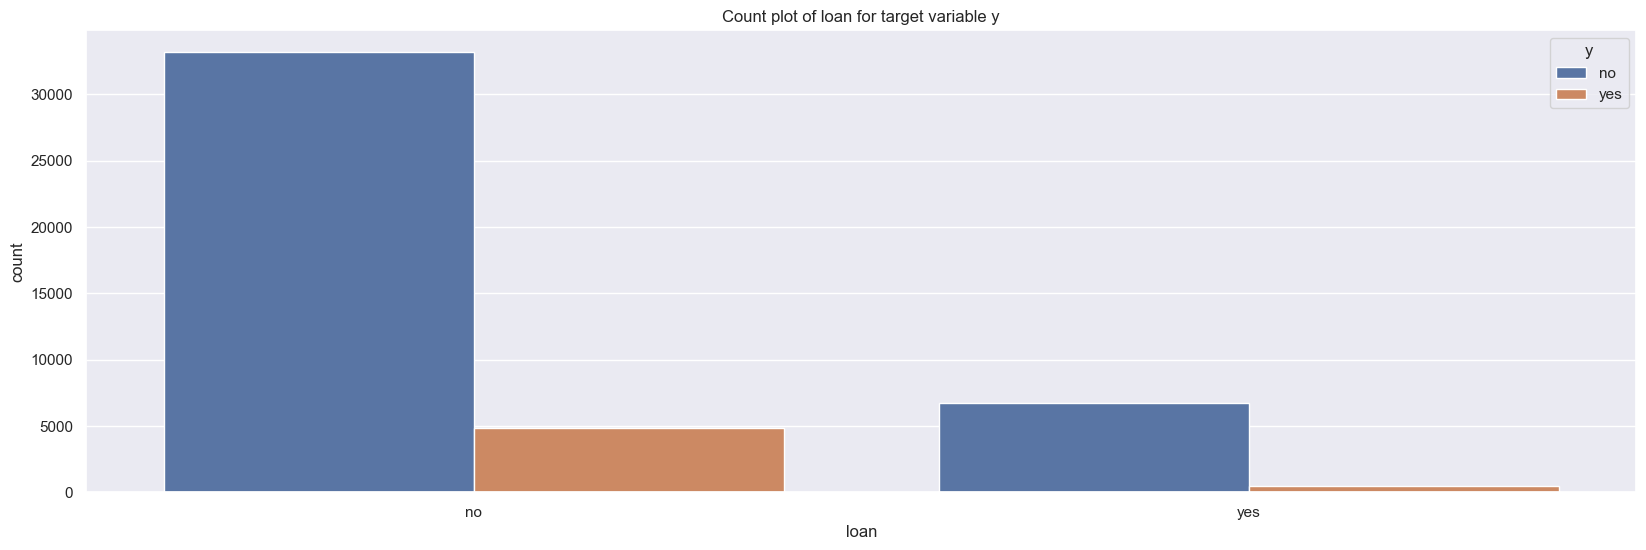

In [29]:
sns.countplot(x=df['loan'], data=df, hue=df['y'])
plt.title('Count plot of loan for target variable y')

__Observation:__  
* As seen for default variable, less client are contacted who have loan.

<h4> Pairplot </h4>

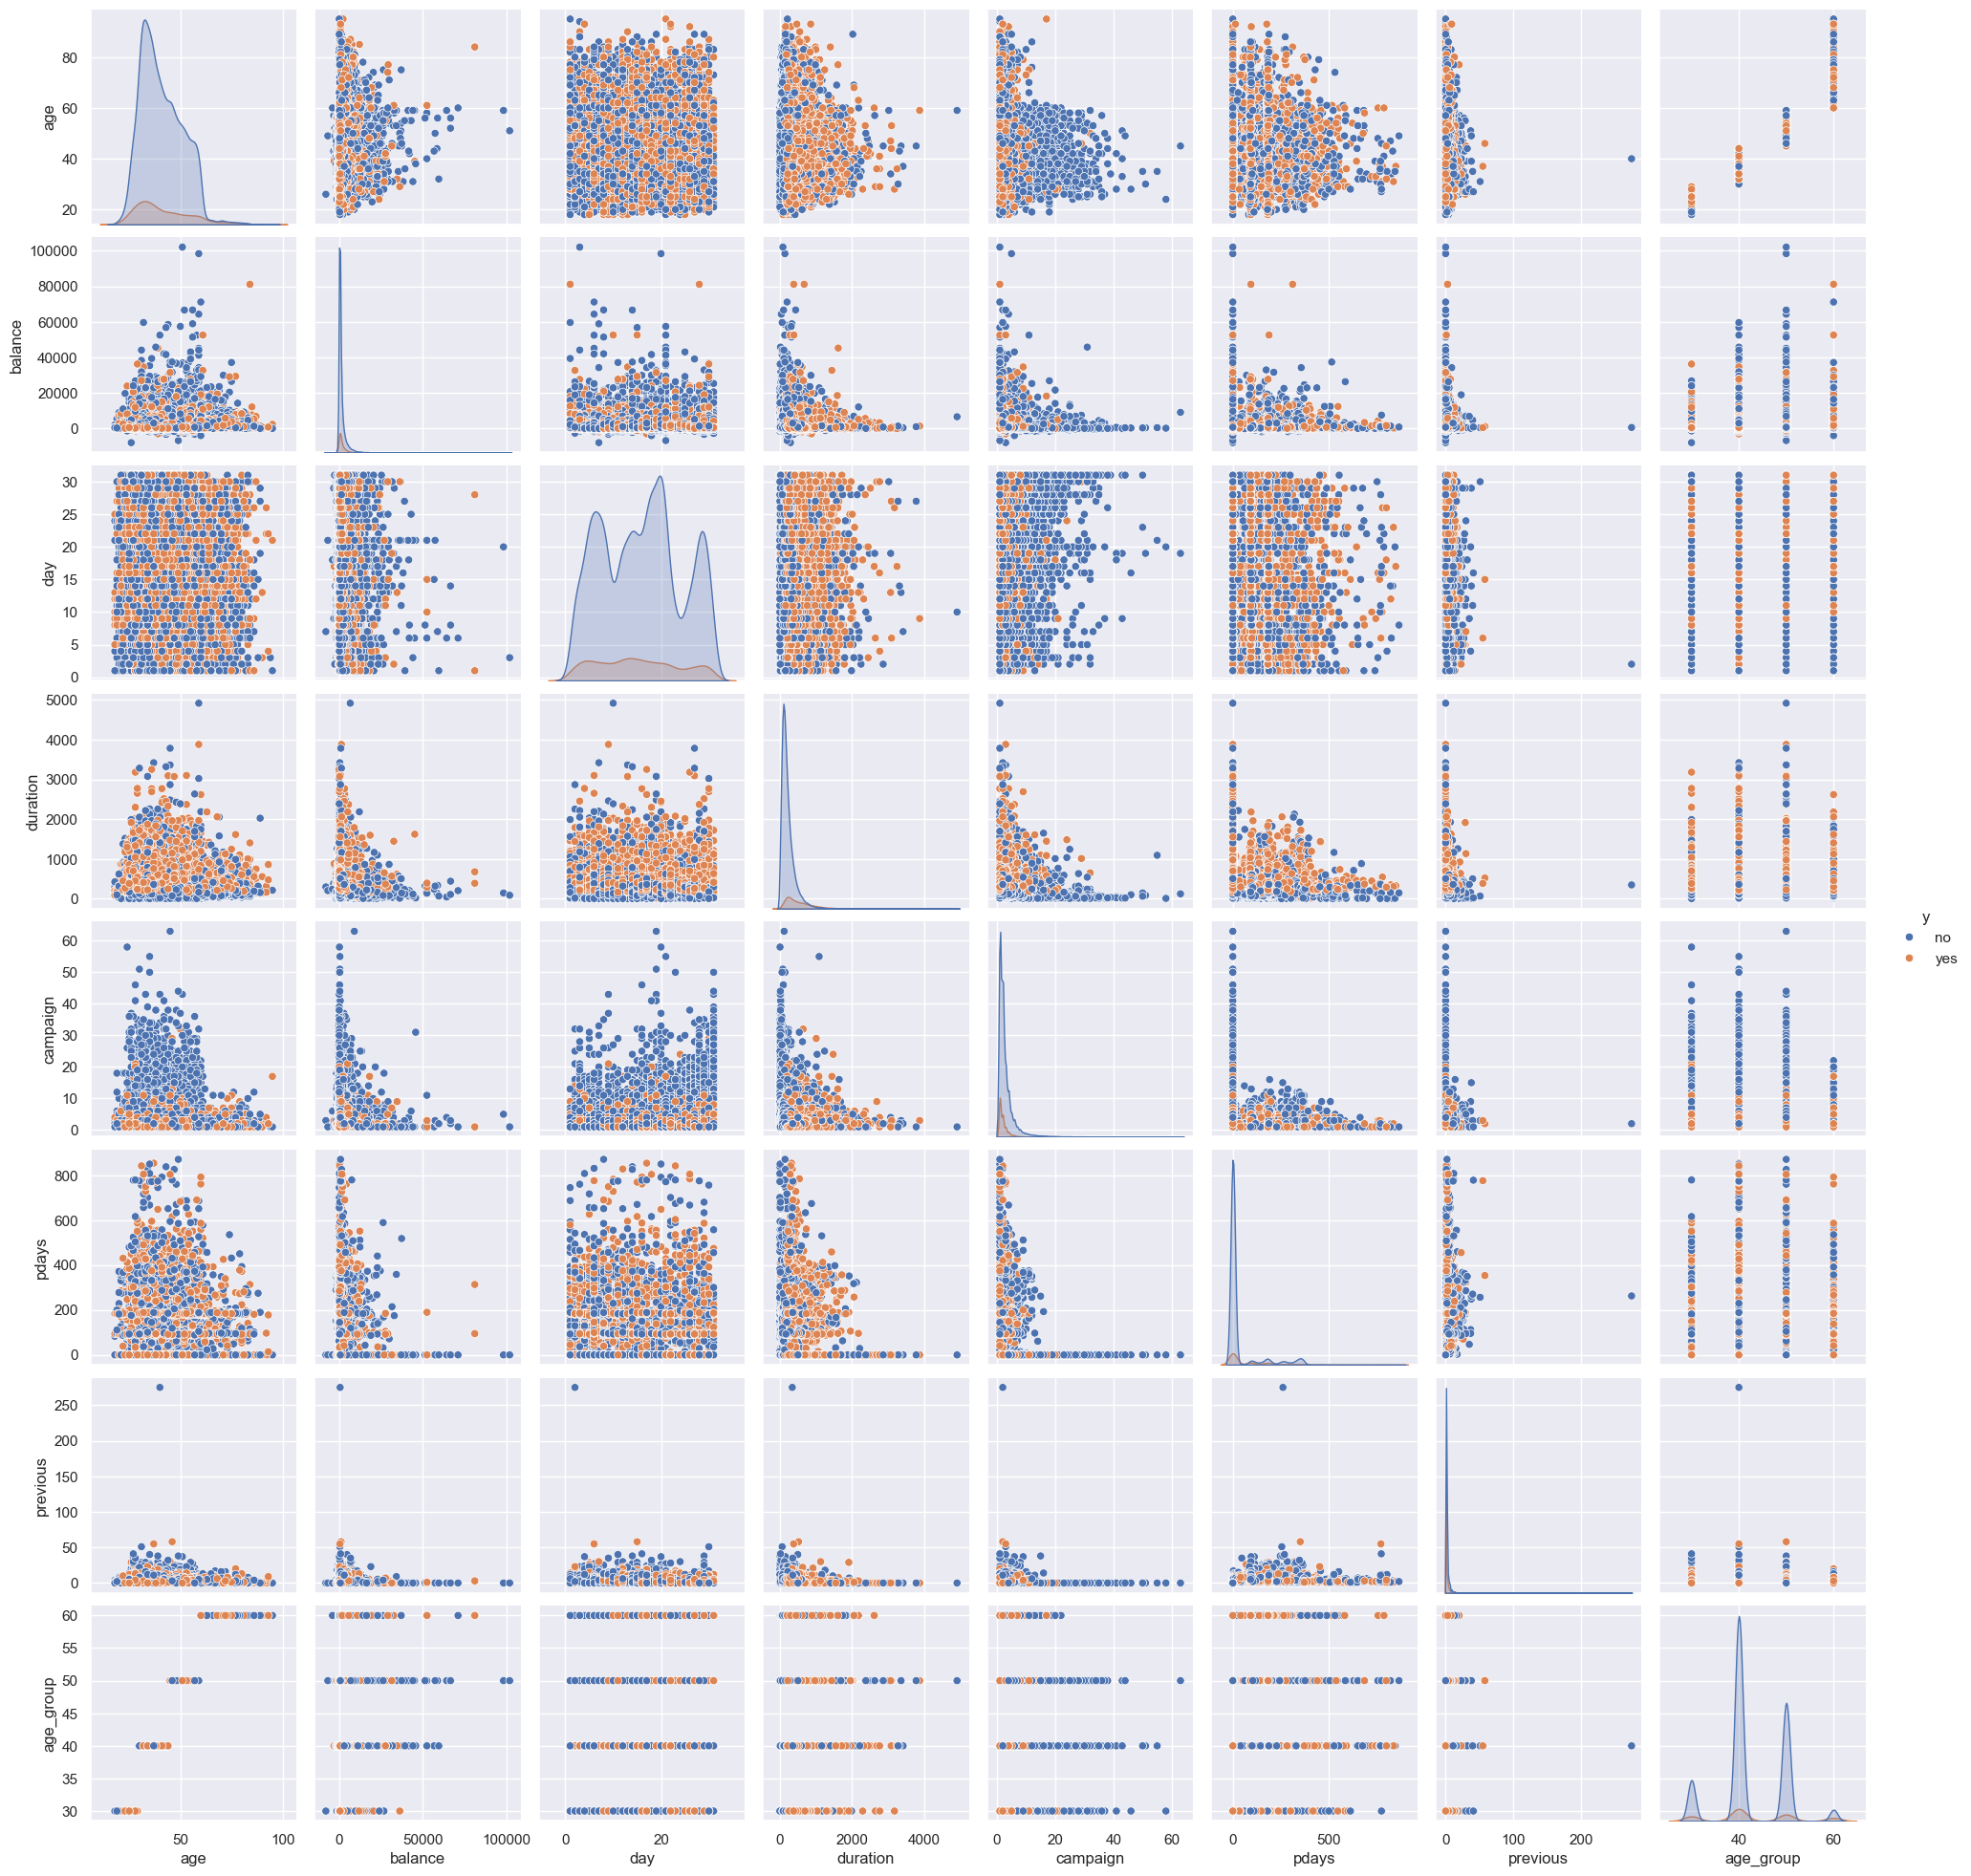

In [30]:
#data.drop('age_group', axis=1, inplace=True)
sns.pairplot(df, hue='y')

__Observation:__  
* For most of the variables our pair plot is overlapping a lot.
* Pair plots of age-campaign and day-campaign are much efficient in distinguishing between different classes with very few overlapes.

In [31]:
# Summary of the Categorical features:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [32]:
df.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
age_group    0
dtype: int64

#### Cleaning & polishing

In [34]:
# Permanently remove the poutcome column as most of its value is "unknown"
# Permanetly remove contact, day & month as they are not relevant for our purpose.
df.drop(columns=['poutcome','contact','day','month'], inplace= True)


In [35]:
# Replace name of target variable y with outcome to be Explanatory
df.rename(columns={'y': 'subscription'}, inplace=True)


In [36]:
# Drop the rows that have the label "unknown" in both the job & education columns:
df.drop(df[(df['job'] == 'unknown') | (df['education'] == 'unknown')].index, inplace=True)


In [37]:

# Take the numerical variables to check the dataset distribution
num_feat = df[['age','balance', 'duration', 'campaign','pdays','previous','subscription']]


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           43193 non-null  int64  
 1   job           43193 non-null  object 
 2   marital       43193 non-null  object 
 3   education     43193 non-null  object 
 4   default       43193 non-null  object 
 5   balance       43193 non-null  int64  
 6   housing       43193 non-null  object 
 7   loan          43193 non-null  object 
 8   duration      43193 non-null  int64  
 9   campaign      43193 non-null  int64  
 10  pdays         43193 non-null  int64  
 11  previous      43193 non-null  int64  
 12  subscription  43193 non-null  object 
 13  age_group     43193 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 4.9+ MB


I removed almost 2018 rows their value was unknown which the rows was 45211 and now 43193

In [39]:
# Summary of the numerical features:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,43193.0,40.764082,10.512640,18.0,33.0,39.0,48.0,95.0
balance,43193.0,1354.027342,3042.103625,-8019.0,71.0,442.0,1412.0,102127.0
duration,43193.0,258.323409,258.162006,0.0,103.0,180.0,318.0,4918.0
campaign,43193.0,2.758178,3.063987,1.0,1.0,2.0,3.0,58.0
pdays,43193.0,40.404070,100.420624,-1.0,-1.0,-1.0,-1.0,871.0
previous,43193.0,0.584863,2.332672,0.0,0.0,0.0,0.0,275.0
age_group,43193.0,42.594402,7.080673,30.0,40.0,40.0,50.0,60.0


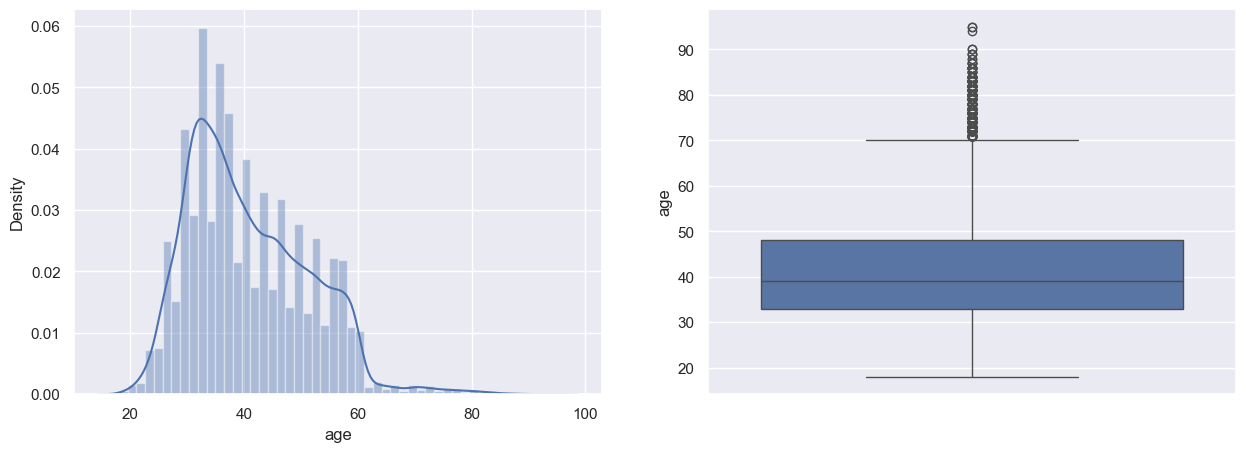

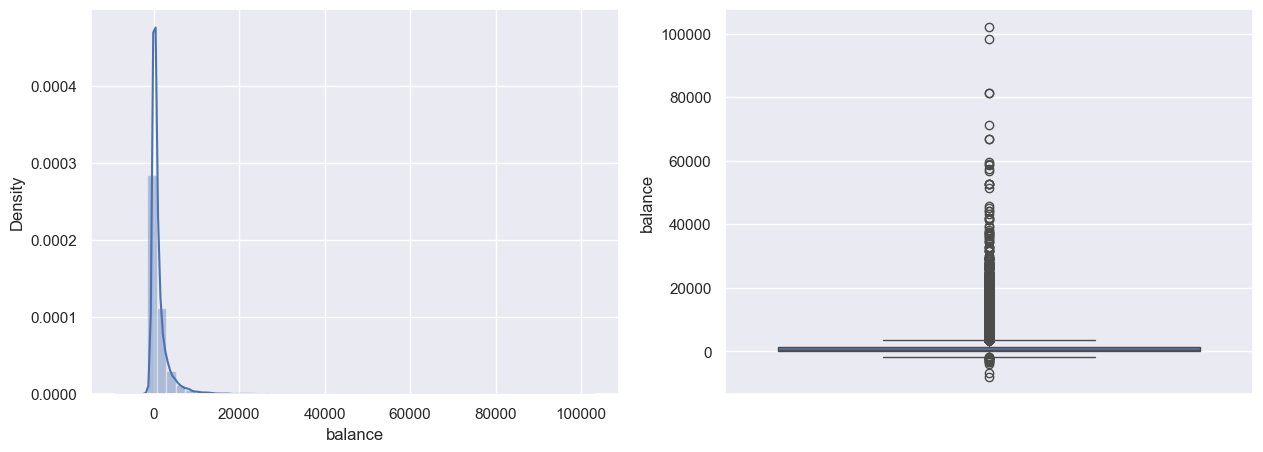

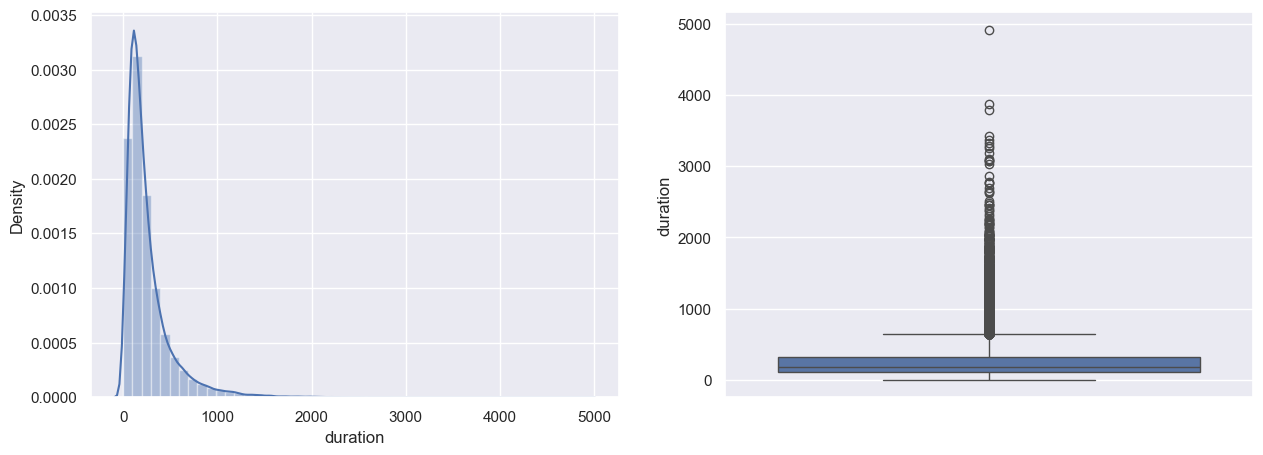

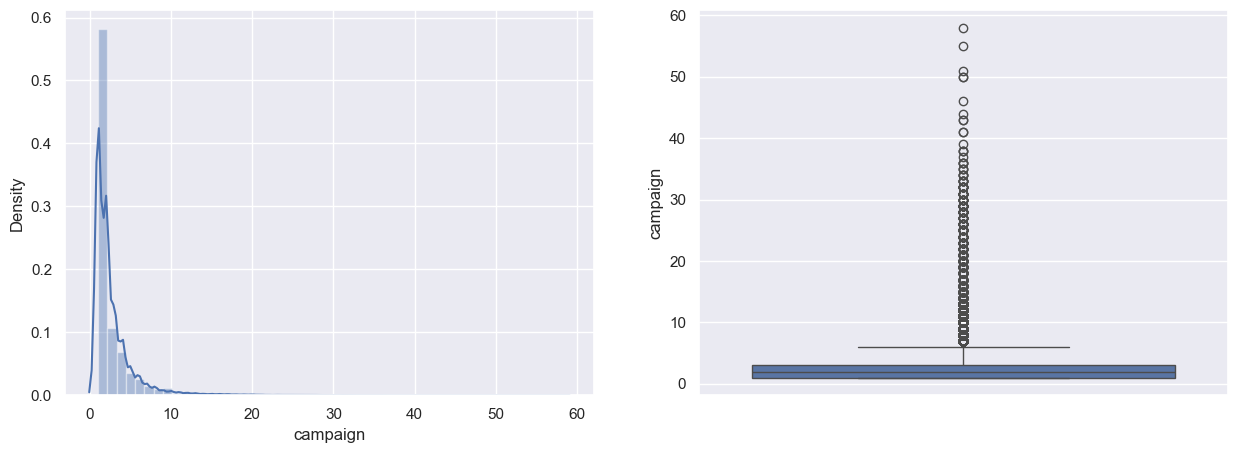

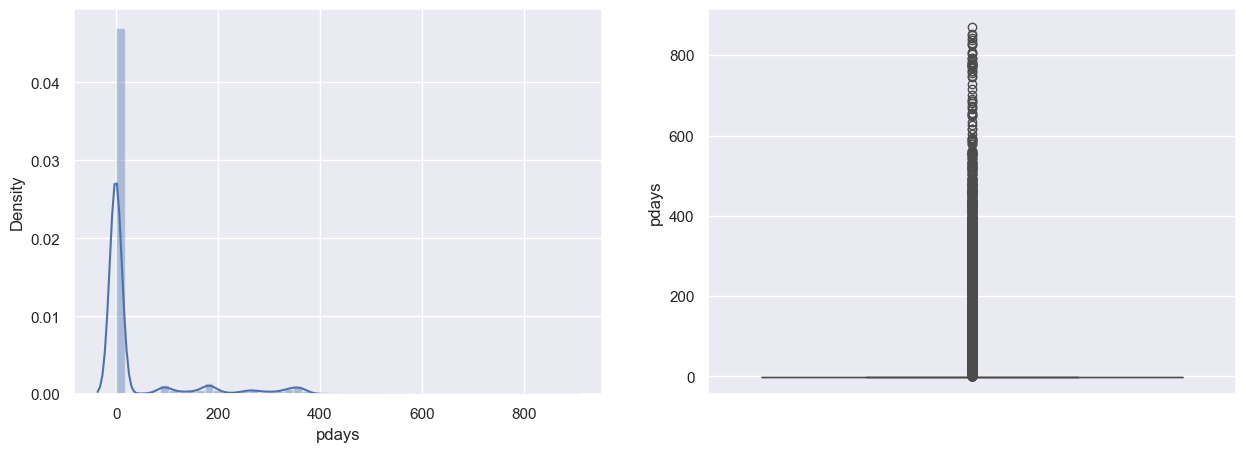

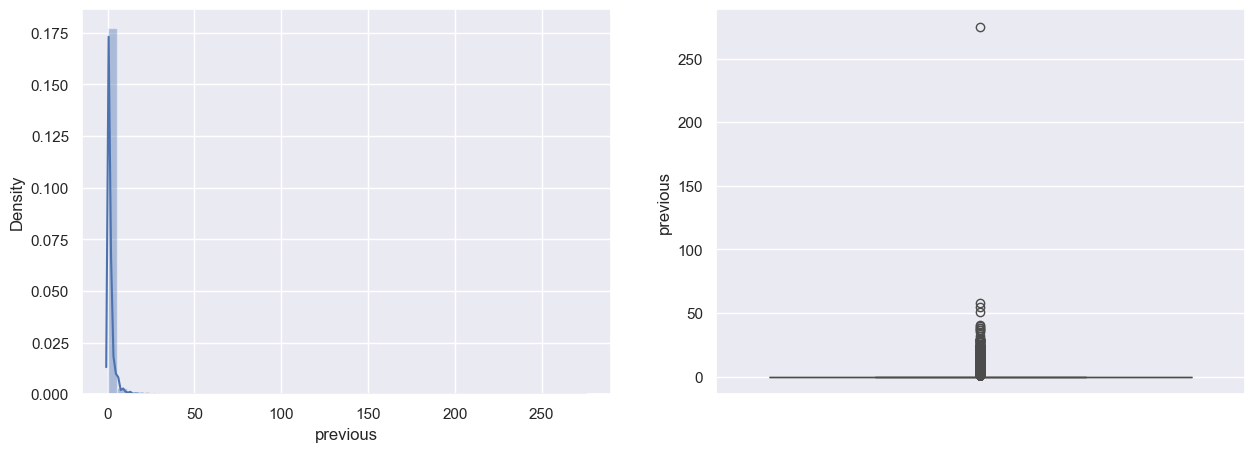

In [40]:
#Visualization of each numerical variable
num_cols = ['age','balance', 'duration', 'campaign', 'pdays','previous']

for i in num_cols:
    fig, ax1 = plt.subplots(1,2,figsize=(15,5))
    sns.distplot(df[i],ax=ax1[0])
    sns.boxplot(y=i,data = df,ax=ax1[1])
    plt.show()

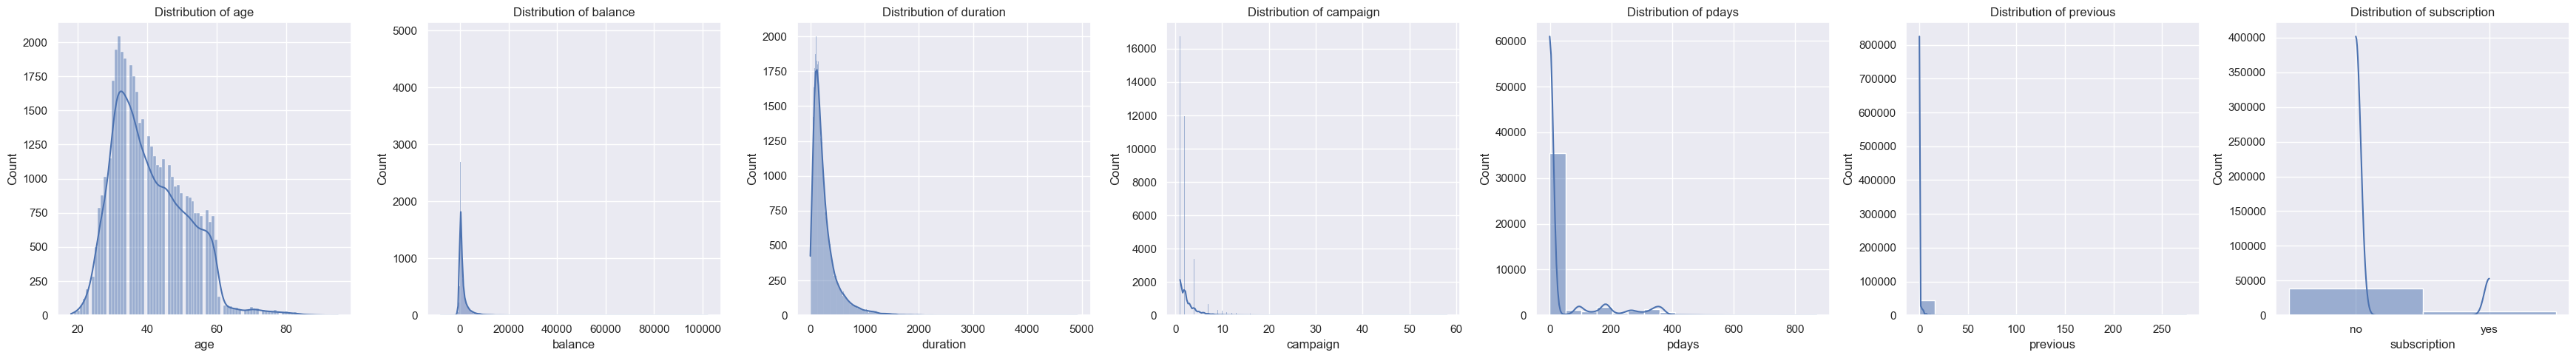

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming num_feat is a DataFrame of numerical features
num_columns = len(num_feat.columns)  # Number of numerical features
n_rows = 1  # Number of rows you want in the subplot grid
n_cols = num_columns  # Number of columns you want in the subplot grid

# Create a figure and a set of subplots
plt.figure(figsize=(n_cols * 5, n_rows * 5))  # Adjust figure size as needed

for i, column in enumerate(num_feat.columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Adds a subplot at the ith position
    sns.histplot(num_feat[column], kde=True)  # Using histplot for distribution, kde for density curve
    plt.title(f'Distribution of {column}')

plt.tight_layout()  # Adjusts subplot params to give specified padding
plt.show()


- All the above numerical features except `**age**` are skewed and neeeded to be normalized using logarithmic transformation:
- Class imbalance in the target variable(outcome)

In [42]:
#Changing the binary outcome column in to numeric values of 1 and 0 :
num_feat.loc[:, 'subscription'] = num_feat['subscription'].map({'yes': 1, 'no': 0})
num_feat

,age,balance,duration,campaign,pdays,previous,subscription
0,58,2143,261,1,-1,0,0
1,44,29,151,1,-1,0,0
2,33,2,76,1,-1,0,0
5,35,231,139,1,-1,0,0
6,28,447,217,1,-1,0,0
...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,1
45207,71,1729,456,2,-1,0,1
45208,72,5715,1127,5,184,3,1
45209,57,668,508,4,-1,0,0


### Using a heatmap to observe the correlations between various predictor variables & target variable(outcome)


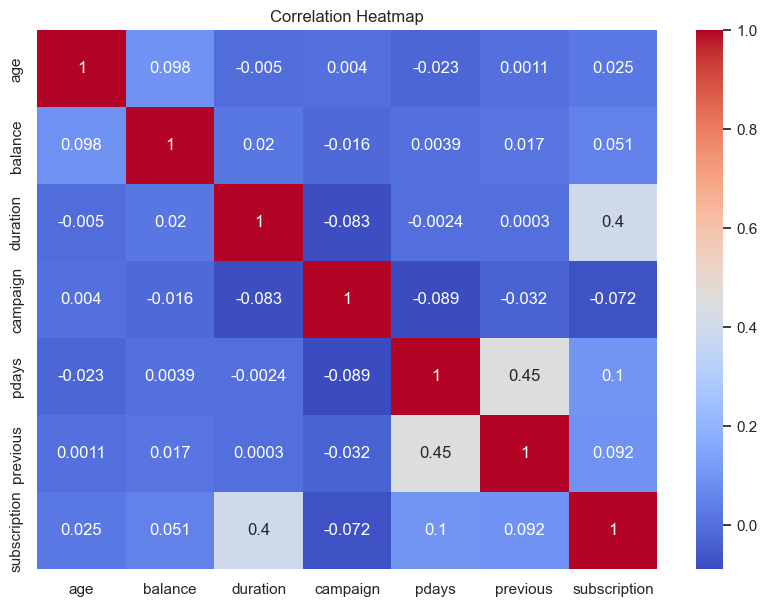

In [43]:
corr_matrix = num_feat.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

#### Scatter Plot to look in to correlation deeper:

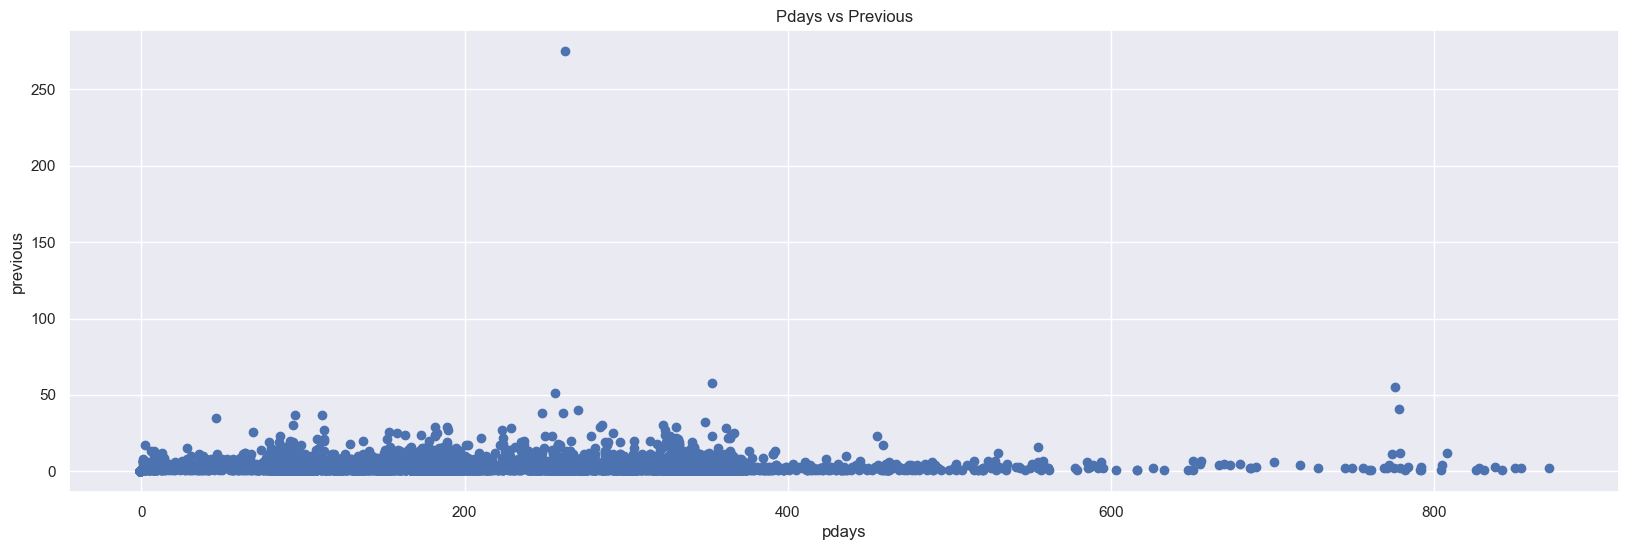

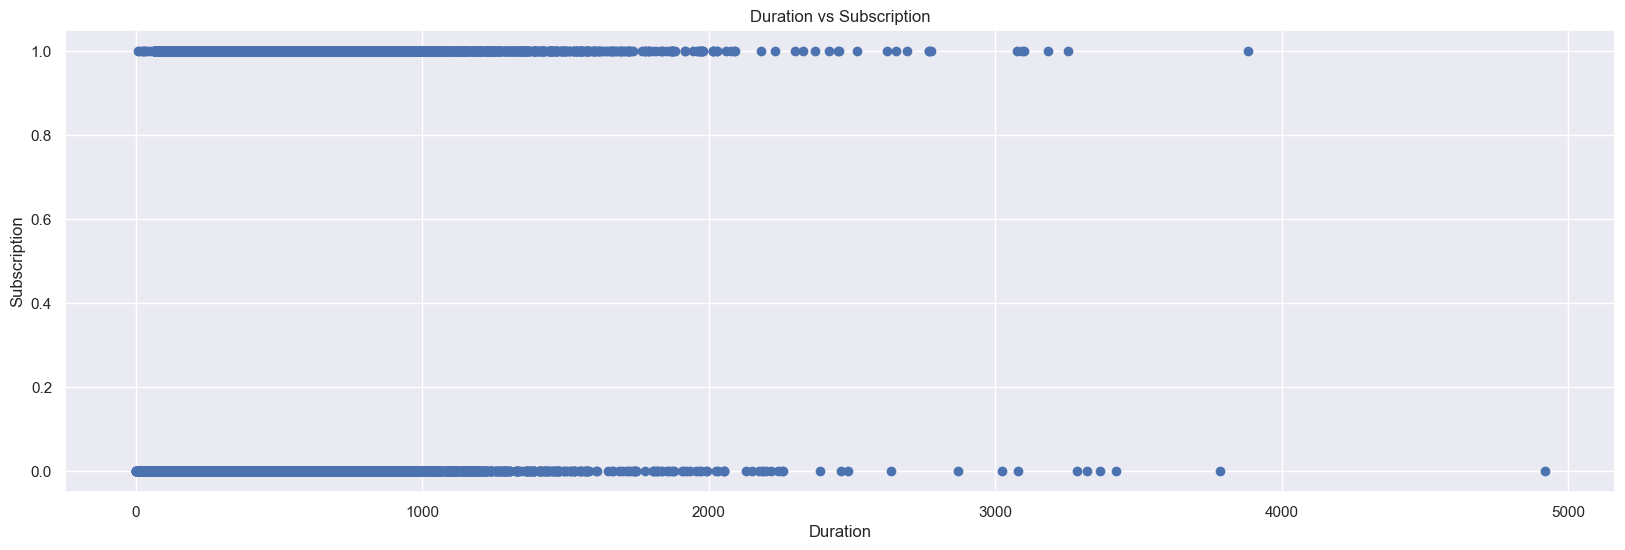

In [44]:

# Scatter plot between pdays and previous
plt.scatter(num_feat['pdays'], num_feat['previous'])
plt.xlabel('pdays')
plt.ylabel('previous')
plt.title('Pdays vs Previous')
plt.show()

# Scatter plot between Milk and Detergents_Paper
plt.scatter(num_feat['duration'], num_feat['subscription'])
plt.xlabel('Duration')
plt.ylabel('Subscription')
plt.title('Duration vs Subscription')
plt.show()

In [45]:
# Check Class imbalance in the outcome column:
value_counts = num_feat['subscription'].value_counts()
print(value_counts)

subscription
0    38172
1     5021
Name: count, dtype: int64


- Noticed class imbalance that can potentially lead our model to predict in favour one over the other. Our outcome columns has 88.38% (labeled as 0) and 11.62% ( labled as 1).

# PART II: Preprocessing & Feature Engineering

####  Scaling the numerical features

In [46]:
num_feat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43193 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           43193 non-null  int64 
 1   balance       43193 non-null  int64 
 2   duration      43193 non-null  int64 
 3   campaign      43193 non-null  int64 
 4   pdays         43193 non-null  int64 
 5   previous      43193 non-null  int64 
 6   subscription  43193 non-null  object
dtypes: int64(6), object(1)
memory usage: 2.6+ MB


#### Scaling numerical featuers:

In [47]:
# Scaling numerical features excluding the target variable

from sklearn.preprocessing import StandardScaler

# Separate outcome column as it is binary
num_feat.loc[:, 'subscription'] = num_feat['subscription'].astype(int)
outcome_column = num_feat['subscription']
num_sc = num_feat.drop(columns=['subscription'])

# Standardization using StandardScaler
scaler = StandardScaler()
scaled_num_feat = scaler.fit_transform(num_sc)

# Create a new DataFrame with the standardized values
scaled_df = pd.DataFrame(scaled_num_feat, columns=['Age', 'balance', 'duration', 'campaigns', 'pdays', 'previous'])

# The 'scaled_df' DataFrame contains the standardized values of your numerical features
print(scaled_df)


            Age   balance  duration  campaigns     pdays  previous
0      1.639561  0.259354  0.010368  -0.573827 -0.412311 -0.250730
1      0.307816 -0.435568 -0.415726  -0.573827 -0.412311 -0.250730
2     -0.738556 -0.444443 -0.706245  -0.573827 -0.412311 -0.250730
3     -0.548306 -0.369166 -0.462209  -0.573827 -0.412311 -0.250730
4     -1.214179 -0.298161 -0.160070  -0.573827 -0.412311 -0.250730
...         ...       ...       ...        ...       ...       ...
43188  0.973688 -0.173904  2.783852   0.078925 -0.412311 -0.250730
43189  2.876182  0.123262  0.765716  -0.247451 -0.412311 -0.250730
43190  2.971307  1.433555  3.364890   0.731677  1.429961  1.035364
43191  1.544437 -0.225513  0.967143   0.405301 -0.412311 -0.250730
43192 -0.358057  0.531537  0.397726  -0.247451  1.469794  4.464947

[43193 rows x 6 columns]


#### Normalizing distribution in columns with skewed distribution

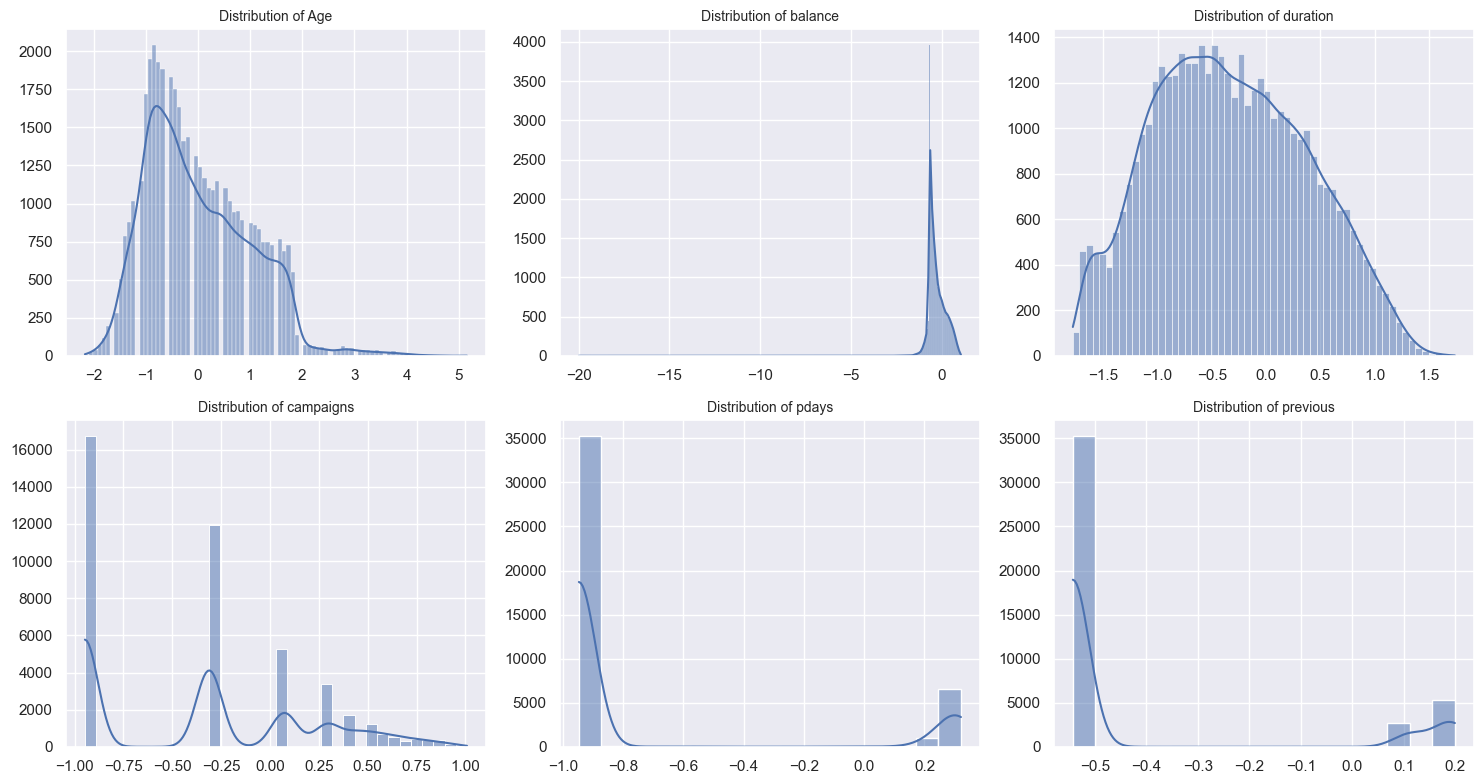

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import yeojohnson
import numpy as np
import math

# Assuming scaled_df is your DataFrame after scaling and you've already transformed your data
columns_to_transform = scaled_df.columns.tolist()

# Transforming columns except 'Age' using yeojohnson
for column in columns_to_transform:
    if column != 'Age':
        transformed_data, _ = yeojohnson(scaled_df[column])
        scaled_df[column] = transformed_data

# Determine the layout of the subplot grid
num_columns = len(scaled_df.columns)
n_rows = int(math.sqrt(num_columns))
n_cols = int(math.ceil(num_columns / n_rows))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Flatten axes array if more than one row
axes = axes.flatten()

# Plotting each column's distribution
for i, column in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplot areas
for i in range(num_columns, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()




In [49]:
# Change data type of outcome column & add it to our numerical columns:
scaled_df['subscription'] = outcome_column.reset_index(drop=True)

scaled_num_feat = scaled_df
scaled_num_feat['subscription'] = scaled_num_feat['subscription'].astype(int)
scaled_num_feat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           43193 non-null  float64
 1   balance       43193 non-null  float64
 2   duration      43193 non-null  float64
 3   campaigns     43193 non-null  float64
 4   pdays         43193 non-null  float64
 5   previous      43193 non-null  float64
 6   subscription  43193 non-null  int32  
dtypes: float64(6), int32(1)
memory usage: 2.1 MB


#### Convert Categorical columns in to binaries

In [50]:
#Encoding the columns Job, Marital  & Education to prepare for modeling:
# Columns to include in the encoding
columns_to_encode = ['job','marital','education']

# Perform one hot encoding on the specified columns
Encoded_df = pd.get_dummies(df, columns=columns_to_encode, dtype=int)

# Select only categorical features in the resulting dataframe:
cat_feat = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid','job_management', 'job_retired', 
            'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed','marital_divorced', 
            'marital_married', 'marital_single','education_primary', 'education_secondary', 'education_tertiary','default',
            'housing','loan']

encoded_cat_feat = Encoded_df[cat_feat]
encoded_cat_feat

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default,housing,loan
0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,no,yes,no
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,no,yes,no
2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,no,yes,yes
5,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,no,yes,no
6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,no,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,no,no,no
45207,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,no,no,no
45208,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,no,no,no
45209,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,no,no,no


#### Change the binary(boolean & object data type) columns in to numerical:

In [51]:
# Replace binary columns of "Yes" or "No" in to 1 & 0 to be suitable for our ML model

# encoded_cat_feat.info()
mapping = {'yes': 1, 'no': 0}

# Map 'yes' and 'no' values to 1 and 0
columns_to_convert = ['default', 'housing', 'loan']
encoded_cat_feat.loc[:,columns_to_convert] = encoded_cat_feat[columns_to_convert].replace(mapping)

# Convert 'default', 'housing', and 'loan' columns to integer data type
encoded_cat_feat.loc[:,columns_to_convert] = encoded_cat_feat[columns_to_convert].astype(int)


In [52]:
# Combine the categorical and numerical dataframes to prepare for splitting and modeling:

encoded_cat_feat_reset = encoded_cat_feat.reset_index(drop=True)

# Combine both DataFrames horizontally using pd.concat
ready_df = pd.concat([scaled_num_feat, encoded_cat_feat_reset], axis=1)


### Preparing & Splitting Dataset in to training and testing dataset:

In [53]:

# Separare the outcome column(dependent variable) from the overall dataframe:
outcome_df = ready_df[['subscription']].copy()

# Drop the 'Outcome' column from the original DataFrame to keep only the features
features_df = ready_df.drop(columns=['subscription'])


#### Shuffling data randomly 

In [54]:
#Defining x, y variables for building model
from sklearn.utils import shuffle

X, y = features_df, outcome_df

#shuffling data randomly to remove underlying ordering and patterns:
X, y = shuffle(X, y, random_state=27)

print(f'Dataset has {X.shape[0]} data points and {X.shape[1]} features')
print(f'Dataset has {y.shape[0]} data points and {y.shape[1]} features')

Dataset has 43193 data points and 26 features
Dataset has 43193 data points and 1 features


#### Splitting data:

In [55]:
# Splitting data in to train/test
from sklearn.model_selection import train_test_split
train_ratio = 0.80
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, train_size=train_ratio) 

print(f'{len(X_train)} training samples and {len(X_test)} test samples')


34554 training samples and 8639 test samples


#### Handling Class imbalance in our y variable(outcome):

In [56]:
# Assuming y_train is your target variable in the training dataset

import numpy as np

# Calculate class weights for class 0 and class 1
class_weights = {
    0: len(y_train) / (2 * np.sum(y_train == 0)),
    1: len(y_train) / (2 * np.sum(y_train == 1))
}

# Calculate the sum of class weights
sum_class_weights = sum(class_weights.values())

# Normalize class weights so that they sum up to 1
normalized_class_weights = {
    0: class_weights[0] / sum_class_weights,
    1: class_weights[1] / sum_class_weights
}

# Display normalized class weights
print(f"Normalized class weight for class 0: {normalized_class_weights[0]}")
print(f"Normalized class weight for class 1: {normalized_class_weights[1]}")


Normalized class weight for class 0: subscription    0.115906
dtype: float64
Normalized class weight for class 1: subscription    0.884094
dtype: float64


# PART III: Training & Evaluating ML model

# Modelling

After making sure our data is good and ready we can continue to building our model. In this notebook we will try to build 6 different models with different algorithm. 


<div align='center'><img src='https://miro.medium.com/max/2102/1*fxiTNIgOyvAombPJx5KGeA.png' height='250'></div>
where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.

We will use 6 metrics below to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.
<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>
2. Precision: used to calculate how much proportion of all data that was predicted positive **was** actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>
5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
    
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes



In this case we want to focus on the recall value of our model because in our problem we should try to predict as many actual positive as we can. Because a misclassification of customer who **actually** wanted to make a deposit can mean a lose opportunity/revenue.

Below we will define a helper function to evaluate each trained model and with the metrics mentioned above and save the score to a variable.

In [57]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

##### Logistic Regression #####


In [58]:
from sklearn.linear_model import LogisticRegression

# Now you can create an instance of LogisticRegression with the specified parameters
model = LogisticRegression(penalty='l2', max_iter=1000)


In [59]:
model=LogisticRegression(penalty='l2', max_iter=1000)


In [60]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [61]:
prediction=model.predict(X_test)


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.8885287649033453

In [63]:
# Evaluate the model on training data
train_results = evaluate_model(model, X_train, y_train)
print("Training Data Evaluation:")
for key, value in train_results.items():
    if key not in ['fpr', 'tpr', 'cm']:  # These are arrays or matrices, so we handle them separately
        print(f"{key}: {value:.4f}")
# If you want to print confusion matrix as well, you can do so here

# Evaluate the model on test data
test_results = evaluate_model(model, X_test, y_test)
print("\nTest Data Evaluation:")
for key, value in test_results.items():
    if key not in ['fpr', 'tpr', 'cm']:  # Similarly, exclude array/matrix values for a clean print
        print(f"{key}: {value:.4f}")
# And here, you might want to print the confusion matrix or any other detailed evaluation



Training Data Evaluation:
acc: 0.8937
prec: 0.5973
rec: 0.2537
f1: 0.3561
kappa: 0.3083
auc: 0.8766

Test Data Evaluation:
acc: 0.8885
prec: 0.5615
rec: 0.2382
f1: 0.3345
kappa: 0.2843
auc: 0.8676


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, prediction)
print(confusion_matrix)

[[7434  189]
 [ 774  242]]


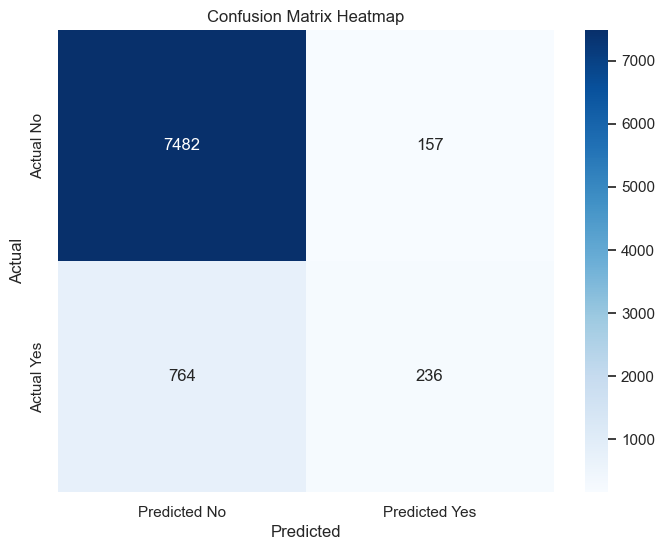

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()



##### Support Vector Machine (SVM) ####


In [66]:
from sklearn.svm import SVC
clf = SVC()

In [67]:
clf.fit(X_train, y_train)

SVC()

In [68]:
pred = clf.predict(X_test)


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on training data
train_pred = clf.predict(X_train)

# Predictions on test data
test_pred = clf.predict(X_test)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred, average='binary')
train_recall = recall_score(y_train, train_pred, average='binary')
train_f1 = f1_score(y_train, train_pred, average='binary')
train_conf_matrix = confusion_matrix(y_train, train_pred)

# Evaluate on test data
test_accuracy = accuracy_score(y_test, test_pred)
test_precision = precision_score(y_test, test_pred, average='binary')
test_recall = recall_score(y_test, test_pred, average='binary')
test_f1 = f1_score(y_test, test_pred, average='binary')
test_conf_matrix = confusion_matrix(y_test, test_pred)

# Display results
print("Training Data Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"Confusion Matrix:\n{train_conf_matrix}\n")

print("Test Data Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"Confusion Matrix:\n{test_conf_matrix}")


Training Data Metrics:
Accuracy: 0.8931816866354112
Precision: 0.6918604651162791
Recall: 0.14797314100969908
F1 Score: 0.24380249948780988
Confusion Matrix:
[[30268   265]
 [ 3426   595]]

Test Data Metrics:
Accuracy: 0.8914226183586064
Precision: 0.6614583333333334
Recall: 0.127
F1 Score: 0.21308724832214768
Confusion Matrix:
[[7574   65]
 [ 873  127]]


In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8914226183586064

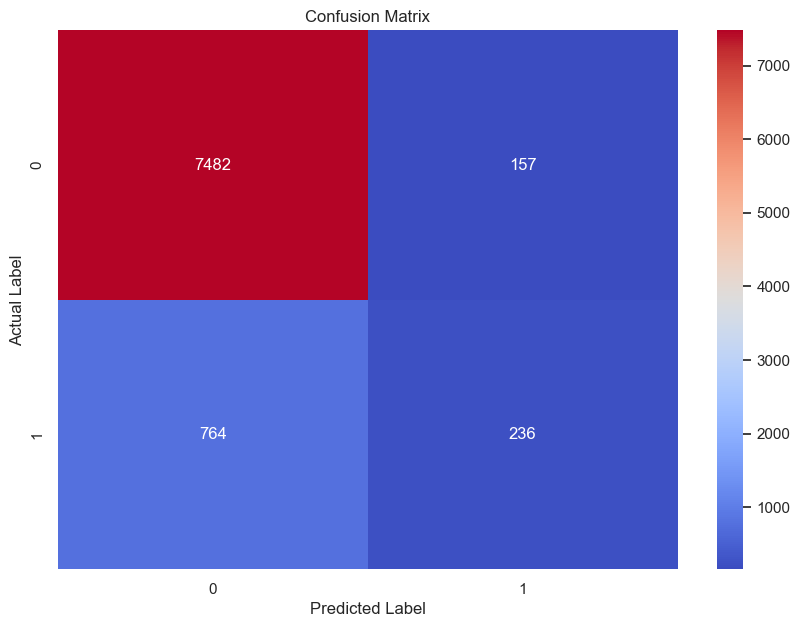

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Assuming you have a trained SVM model and test data ready
# svm_model = SVC().fit(X_train, y_train)
# y_pred = svm_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Use Seaborn to create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


### Decision Tree #####

Decision tree is a tree shaped diagram used to determine a course of action. Each branch of the tree represents a possible decision, occurrence or reaction.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/decision_tree.PNG' height='250'></div>

Advantages:
* Inexpensive to construct
* Extremely fast at classifying unknown records
* Easy to interpret for small-sized trees•
* Accuracy is comparable to other classification techniques for many simple data sets

Disadvantages:
* Overfitting when algorithm capture noise in the data
* The model can get unstable due to small variation of data
* Low biased tree: difficult for the model to work with new data

### Building Model

In [72]:
from sklearn import tree

# Building Decision Tree model
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Model Evaluation

In [73]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.8516031948142146
Precision: 0.36944444444444446
Recall: 0.399
F1 Score: 0.3836538461538461
Cohens Kappa Score: 0.29944247371137667
Area Under Curve: 0.6549261028930489
Confusion Matrix:
 [[6958  681]
 [ 601  399]]


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, roc_curve

# Evaluate on Training Data
train_pred = dtc.predict(X_train)
train_pred_proba = dtc.predict_proba(X_train)[:, 1]  # For AUC calculation

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, train_pred)
train_precision = precision_score(y_train, train_pred)
train_recall = recall_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)
train_kappa = cohen_kappa_score(y_train, train_pred)
train_auc = roc_auc_score(y_train, train_pred_proba)
train_cm = confusion_matrix(y_train, train_pred)

# Evaluate on Test Data
# Assuming dtc_eval contains your test evaluation results

# Print Training Data Results
print("Training Data Results:")
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')
print(f'Cohens Kappa Score: {train_kappa}')
print(f'Area Under Curve: {train_auc}')
print(f'Confusion Matrix:\n{train_cm}\n')

# Print Test Data Results
print("Test Data Results:")
print(f'Accuracy: {dtc_eval["acc"]}')
print(f'Precision: {dtc_eval["prec"]}')
print(f'Recall: {dtc_eval["rec"]}')
print(f'F1 Score: {dtc_eval["f1"]}')
print(f'Cohens Kappa Score: {dtc_eval["kappa"]}')
print(f'Area Under Curve: {dtc_eval["auc"]}')
print(f'Confusion Matrix:\n{dtc_eval["cm"]}')


Training Data Results:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Cohens Kappa Score: 1.0
Area Under Curve: 1.0
Confusion Matrix:
[[30533     0]
 [    0  4021]]

Test Data Results:
Accuracy: 0.8516031948142146
Precision: 0.36944444444444446
Recall: 0.399
F1 Score: 0.3836538461538461
Cohens Kappa Score: 0.29944247371137667
Area Under Curve: 0.6549261028930489
Confusion Matrix:
[[6958  681]
 [ 601  399]]


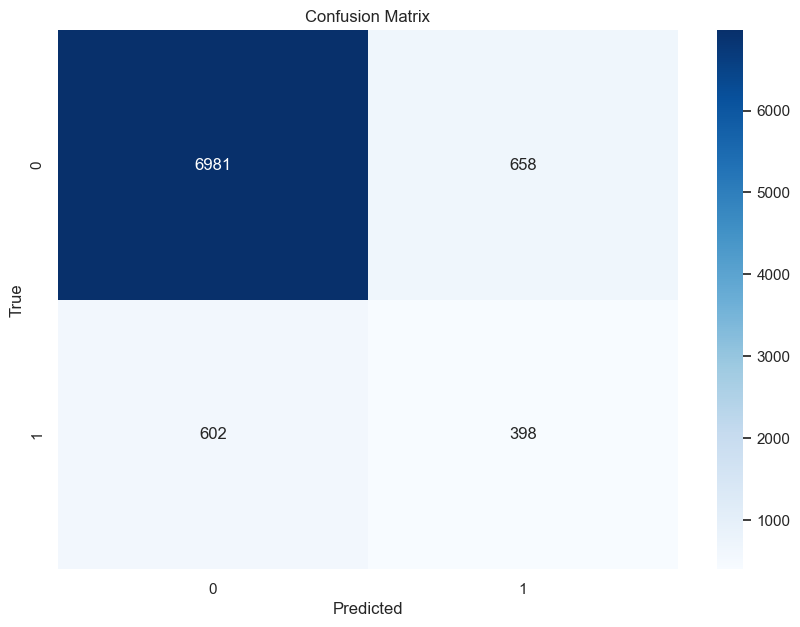

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target arrays
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = dt_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap with the "Blues" colormap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### K-Nearest Neighbors ####

K-Nearest Neighbors (KNN) classify new data by finding k-number of closest neighbor from the training data and then decide the class based on the majority of it's neighbors. For example in the image below where $k = 3$ majority of it's neighbor is classified as B, but when $k = 7$ the majority will changes to A.

<div align='center'><img src='https://raw.githubusercontent.com/rafiag/DTI2020/main/images/knn.PNG' height='200'></div>

Advantages:
* Simple technique that is easily implemented
* Building model is cheap
* Extremely flexible classification scheme

Disadvantages:
* Classifying unknown records are relatively expensive
* Requires distance computation of k-nearest neighbors
* Computationally intensive, especially when the size of the training set grows
* Accuracy can be severely degraded by the presence of noisy or irrelevant features

### Building Model

In [76]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Model Evaluation

In [77]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
# Safely print results using .get() to avoid KeyError
print('Accuracy:', knn_eval.get('acc', 'Key not found'))
print('Precision:', knn_eval.get('prec', 'Key not found'))
print('Recall:', knn_eval.get('rec', 'Key not found'))
print('F1 Score:', knn_eval.get('f1', 'Key not found'))
print('Cohens Kappa Score:', knn_eval.get('kappa', 'Key not found'))
print('Area Under Curve:', knn_eval.get('auc', 'Key not found'))
print('Confusion Matrix:\n', knn_eval.get('cm', 'Key not found'))


Accuracy: 0.8827410579928232
Precision: 0.487378640776699
Recall: 0.251
F1 Score: 0.3313531353135314
Cohens Kappa Score: 0.2742374100033297
Area Under Curve: 0.7867407383165336
Confusion Matrix:
 [[7375  264]
 [ 749  251]]


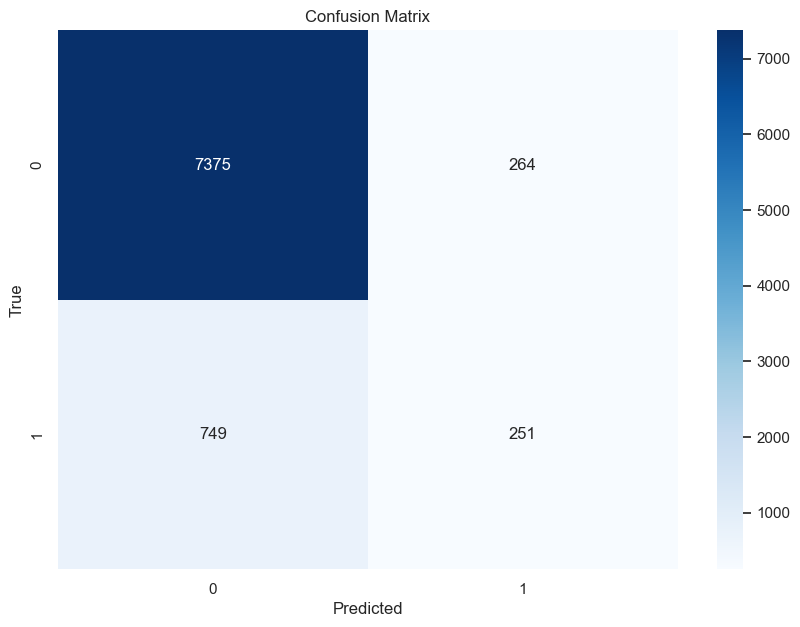

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split your data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap with the "Blues" colormap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



### Naive Bayes

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. Below are the Bayes theorem formula:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)}$</div>

For example, given:
* A doctor knows that meningitis  causes  stiff neck 50% of the time
* Prior probability  of any patient  having  meningitis  is 1/50,000
* Prior probability  of any patient  having  stiff neck is 1/20

Then the probability of patient who have stiff neck to also have meningitis is:

<div align="center">$P(C | A) = \frac{P(A|C) P(C)}{P(A)} = \frac{0.5 * (1 / 50000)}{1 / 20} = 0.0002$</div>

### Building Model

In [79]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Model Evaluation

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predictions on training data
nb_train_pred = nb.predict(X_train)
# Predictions on test data
nb_test_pred = nb.predict(X_test)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, nb_train_pred)
train_precision = precision_score(y_train, nb_train_pred, average='binary')  # Adjust as necessary
train_recall = recall_score(y_train, nb_train_pred, average='binary')  # Adjust as necessary
train_f1 = f1_score(y_train, nb_train_pred, average='binary')  # Adjust as necessary
train_conf_matrix = confusion_matrix(y_train, nb_train_pred)

# Evaluate on test data
test_accuracy = accuracy_score(y_test, nb_test_pred)
test_precision = precision_score(y_test, nb_test_pred, average='binary')  # Adjust as necessary
test_recall = recall_score(y_test, nb_test_pred, average='binary')  # Adjust as necessary
test_f1 = f1_score(y_test, nb_test_pred, average='binary')  # Adjust as necessary
test_conf_matrix = confusion_matrix(y_test, nb_test_pred)

# Print Training Data Results
print("Training Data Results:")
print(f'Accuracy: {train_accuracy}')
print(f'Precision: {train_precision}')
print(f'Recall: {train_recall}')
print(f'F1 Score: {train_f1}')
print(f'Confusion Matrix:\n{train_conf_matrix}\n')

# Print Test Data Results
print("Test Data Results:")
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {test_precision}')
print(f'Recall: {test_recall}')
print(f'F1 Score: {test_f1}')
print(f'Confusion Matrix:\n{test_conf_matrix}')


Training Data Results:
Accuracy: 0.8250564334085779
Precision: 0.3178545716342693
Recall: 0.4391942302909724
F1 Score: 0.36880025060039673
Confusion Matrix:
[[26743  3790]
 [ 2255  1766]]

Test Data Results:
Accuracy: 0.8315777289038083
Precision: 0.33110616184112845
Recall: 0.446
F1 Score: 0.38005965061781
Confusion Matrix:
[[6738  901]
 [ 554  446]]


In [81]:
# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.8315777289038083
Precision: 0.33110616184112845
Recall: 0.446
F1 Score: 0.38005965061781
Cohens Kappa Score: 0.28506791679750787
Area Under Curve: 0.7819151721429506
Confusion Matrix:
 [[6738  901]
 [ 554  446]]


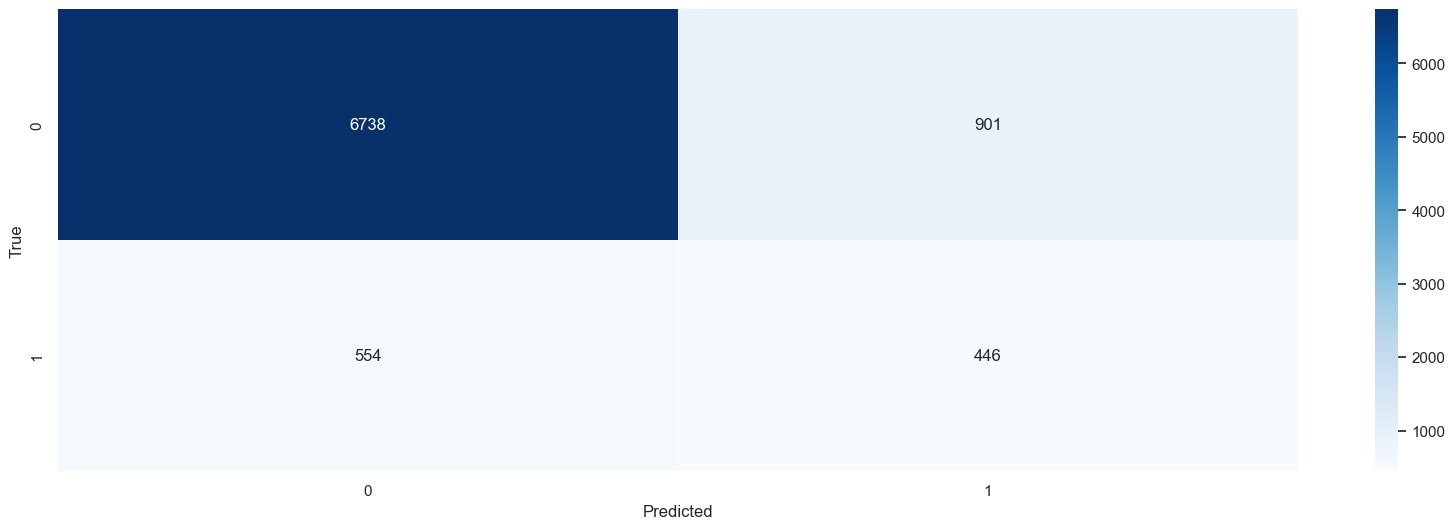

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = nb_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


#### Training our model __(Using Random Forest)__

In [83]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Example class weights calculation (replace this with your actual calculation)
class_weights = {0: 1.0, 1: 10.0}  # Assuming these are the calculated class weights

# Calculate the sum of class weights
sum_class_weights = sum(class_weights.values())

# Normalize class weights so that they sum up to 1
class_weight_0 = class_weights[0] / sum_class_weights
class_weight_1 = class_weights[1] / sum_class_weights

# Now, use these normalized weights in RandomForestClassifier
rfc_model = RandomForestClassifier(class_weight={0: class_weight_0, 1: class_weight_1}, random_state=0)

# Fit the model to your training data
rfc_model.fit(X_train, y_train.values.ravel())

# Make predictions
rfc_pred = rfc_model.predict(X_test)

print(rfc_pred)


[0 0 0 ... 0 0 0]


#### Evaluating RF model prediction:

In [84]:
from sklearn.metrics import accuracy_score, classification_report
# Accuracy Metrics
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8940849635374465


#### Hyperparameter tunning (Random Search method)

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')

# defining hyperparameter Search Space:
param_dist = {
    'n_estimators': sp_randint(100, 500),
    'max_depth': [None] + list(sp_randint(10, 100).rvs(10)),  # Generate 10 random integers in the range
    'min_samples_split': sp_randint(2, 30),
    'min_samples_leaf': sp_randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
}


In [86]:
# Initializing, running RandomizedSearchCV

clf = RandomForestClassifier(random_state=0)

n_iter_search = 25  # Number of random parameter combinations to try
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search, cv=3, scoring='accuracy', n_jobs=-1
)

random_search.fit(X_train, y_train)

#Getting the best hyperparameters & score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 42, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 17, 'n_estimators': 128}
Best Score: 0.8978989407883313


In [87]:
best_params = {
    'bootstrap': True,
    'criterion': 'entropy',
    'max_depth': 56,
    'max_features': None,
    'min_samples_leaf': 12,
    'min_samples_split': 6,
    'n_estimators': 194
}

rfc = RandomForestClassifier(**best_params)

rfc.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=56, max_features=None,
                       min_samples_leaf=12, min_samples_split=6,
                       n_estimators=194)

In [88]:
# Accuracy Metrics
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", best_score)


Accuracy: 0.8978989407883313


In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions on training data
train_preds = rfc.predict(X_train)

# Predictions on testing data
test_preds = rfc.predict(X_test)

# Evaluation Metrics for Training Data
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds, average='binary')
train_recall = recall_score(y_train, train_preds, average='binary')
train_f1 = f1_score(y_train, train_preds, average='binary')
train_conf_matrix = confusion_matrix(y_train, train_preds)

# Evaluation Metrics for Testing Data
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds, average='binary')
test_recall = recall_score(y_test, test_preds, average='binary')
test_f1 = f1_score(y_test, test_preds, average='binary')
test_conf_matrix = confusion_matrix(y_test, test_preds)

# Print Training Data Evaluation Metrics
print("Training Data Results:")
print(f"Accuracy: {train_accuracy}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")
print(f"F1 Score: {train_f1}")
print(f"Confusion Matrix:\n{train_conf_matrix}\n")

# Print Testing Data Evaluation Metrics
print("Testing Data Results:")
print(f"Accuracy: {test_accuracy}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")
print(f"F1 Score: {test_f1}")
print(f"Confusion Matrix:\n{test_conf_matrix}")


Training Data Results:
Accuracy: 0.9275626555536262
Precision: 0.7910276073619632
Recall: 0.5130564536185028
F1 Score: 0.6224166540956404
Confusion Matrix:
[[29988   545]
 [ 1958  2063]]

Testing Data Results:
Accuracy: 0.8977890959601805
Precision: 0.5915492957746479
Recall: 0.378
F1 Score: 0.4612568639414277
Confusion Matrix:
[[7378  261]
 [ 622  378]]


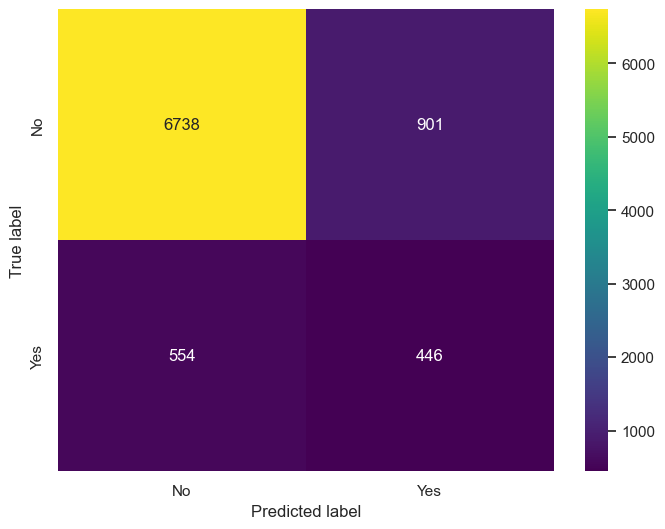

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume you have a trained Random Forest model and test data (X_test, y_test)
# model = RandomForestClassifier().fit(X_train, y_train)  # Replace with your model and training data
# y_pred = model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='viridis', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### compaire the model

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Assuming X and y are your feature set and target variable
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Dictionary to hold the scores for each model
scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    score = accuracy_score(y_test, y_pred)
    scores[model_name] = score
    print(f"{model_name} Accuracy: {score:.4f}")

# Find the model with the highest accuracy
best_model = max(scores, key=scores.get)
print(f"Best performing model: {best_model} with an accuracy of {scores[best_model]:.4f}")


Logistic Regression Accuracy: 0.8934
Random Forest Accuracy: 0.8964
Support Vector Machine Accuracy: 0.8914
K-Nearest Neighbors Accuracy: 0.8827
Decision Tree Accuracy: 0.8517
Naive Bayes Accuracy: 0.8316
Best performing model: Random Forest with an accuracy of 0.8964


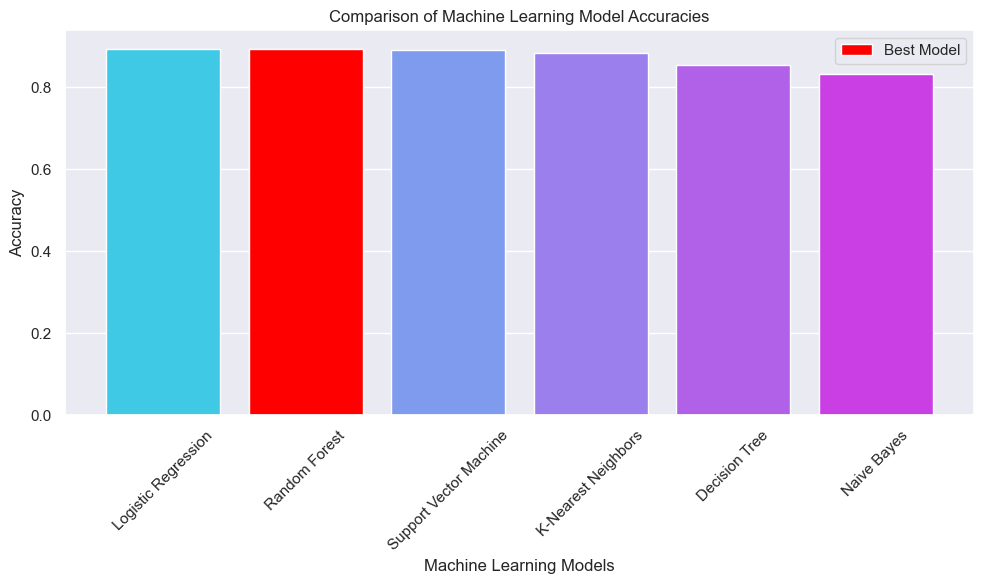

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model accuracy data
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 
          'K-Nearest Neighbors', 'Decision Tree', 'Naive Bayes']
accuracies = [0.8934, 0.8935, 0.8914, 0.8827, 0.8526, 0.8316]

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a bar plot of the model accuracies
sns.barplot(x=models, y=accuracies, palette='cool')

# Highlight the best performing model
best_model_index = accuracies.index(max(accuracies))
plt.bar(models[best_model_index], accuracies[best_model_index], color='red', label='Best Model')

# Add some text for labels and title, and custom x-axis tick labels
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Machine Learning Model Accuracies')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


#### Saving the model:

In [93]:
import joblib

# Save the model to a file
filename = 'C:\Final Project\Final Project.pkl'
joblib.dump(rfc, filename)


['C:\\Final Project\\Final Project.pkl']

# PART IV: Findings & Conclusion

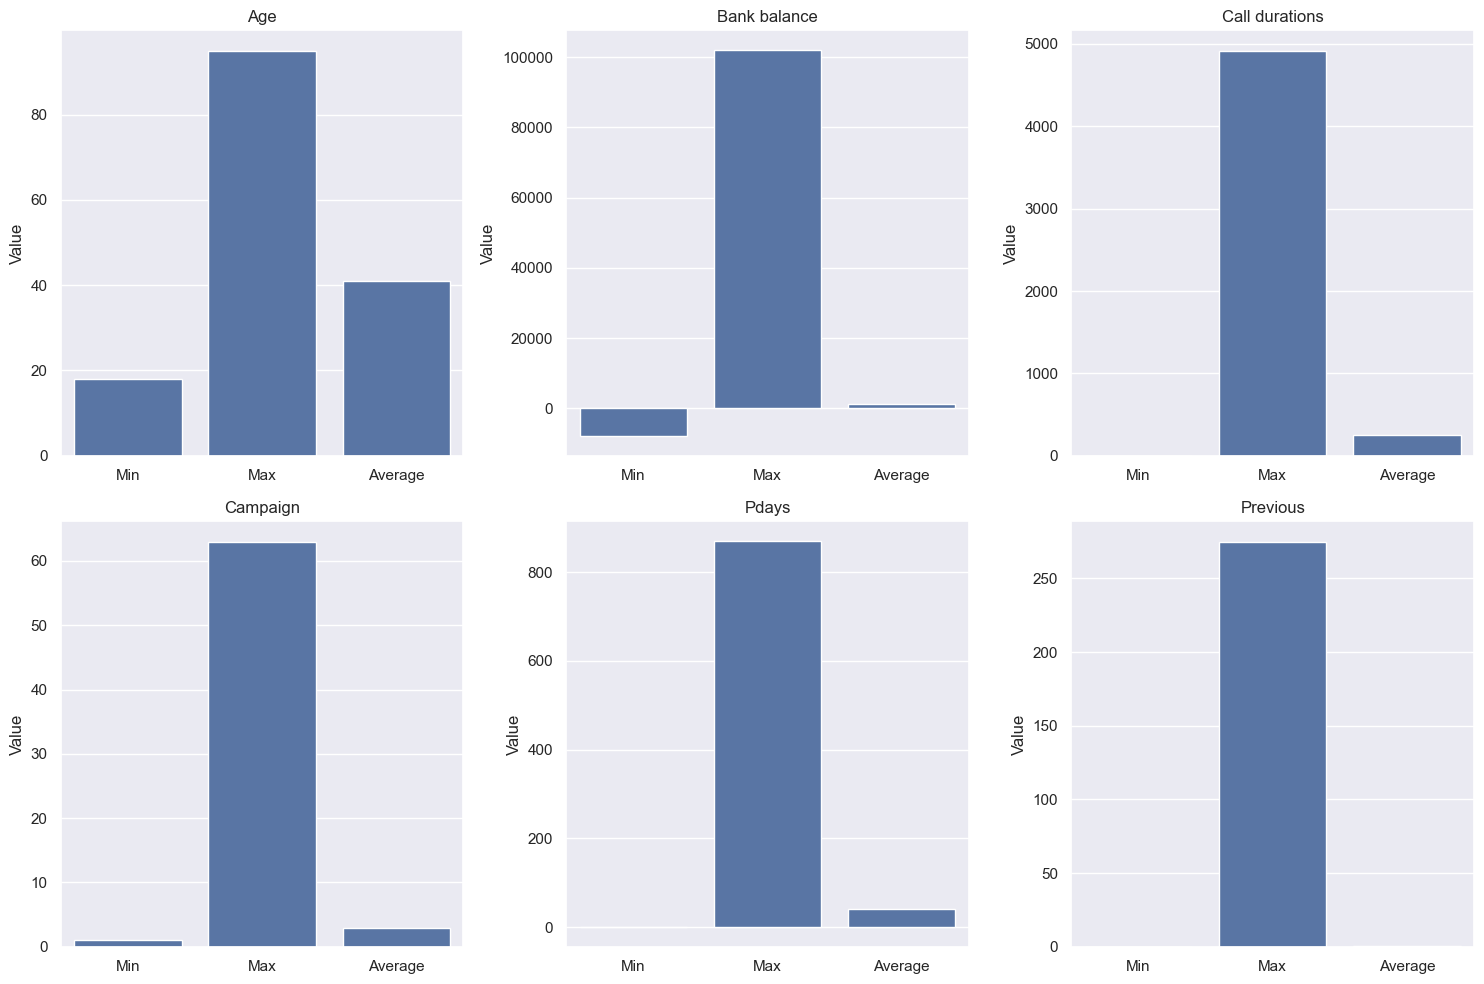

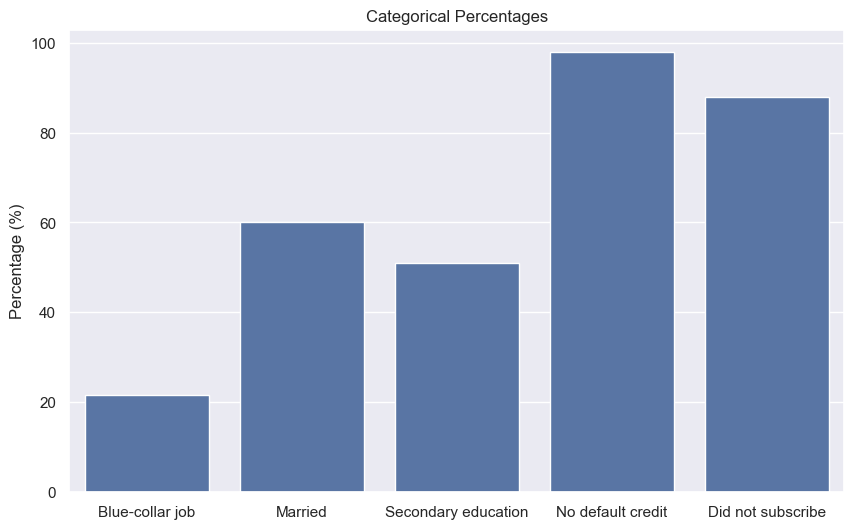

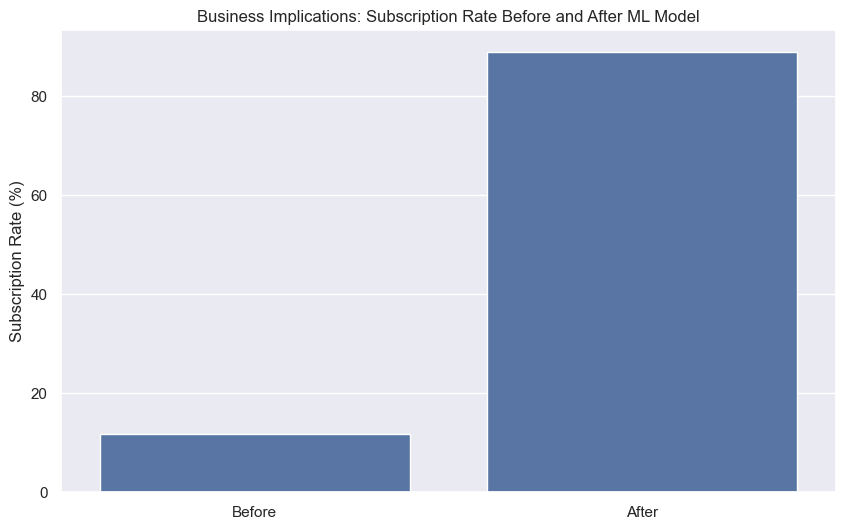

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data to plot
categories = ['Age', 'Bank balance', 'Call durations', 'Campaign', 'Pdays', 'Previous']
ranges = [(18, 95), (-8019.00, 102127.00), (0, 4918), (1, 63), (-1, 871), (0, 275)]
averages = [41, 1362, 258, 3, 40, 0.58]

# Visualization of Ranges and Averages for each category
plt.figure(figsize=(15, 10))

for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=['Min', 'Max', 'Average'], y=[ranges[i][0], ranges[i][1], averages[i]])
    plt.ylabel('Value')
    plt.title(category)

plt.tight_layout()
plt.show()

# Visualization for categorical percentages
labels = ['Blue-collar job', 'Married', 'Secondary education', 'No default credit', 'Did not subscribe']
percentages = [21.5, 60, 51, 98, 88]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=percentages)
plt.ylabel('Percentage (%)')
plt.title('Categorical Percentages')
plt.show()

# Assuming you have the test accuracy stored in a variable `test_accuracy`
test_accuracy = 89

# Business Implications Visualization
before_subscription_rate = 11.62
after_subscription_rate = test_accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=['Before', 'After'], y=[before_subscription_rate, after_subscription_rate])
plt.ylabel('Subscription Rate (%)')
plt.title('Business Implications: Subscription Rate Before and After ML Model')
plt.show()


## Preliminary Observations from Visualizations

- Age: **Ranges**`(18 to 95)`; **Average Age**: `41 years old`
- Bank balance : **Ranges**`(Euro: -8019.00 to 102,127.00)`; **Average Balance**: `Euro 1362`
- Call durations(in seconds): **Ranges**`(0 to 4918)`; **Avarege duration**:`258 seconds`
- Campaign(number of calls during current campaing to a client): **Ranges**`(1 to 63)`; **Average compaign**: `3 days`
- Pdays(Days passed after last contact): **Ranges**`(-1 to 871)`; **Average Pdays**: `40 days`
- Previous(number of calls done before this campaign to a client): **Ranges**`(0 to 275)`; **Average**: `0.58 
- **21.5%** of our clients have a `blue-collar job`
- **60%** of our clients are `married`.
- **51%** of our clients have `secondary` as education level.
- **98%** of our clients has not `default` credit
- **88%** `did not subscribe to the long term deposit` after the campaign.

## Problems in Dataset that were dealt:

- Skewed Distribution in many attributes(Balance) , 

- Class imbalance in the target variable which is subscription and was handled within Random Forest Classification model.

## Result of our ML model:

- The model was able to generalize with **89%** accuracy on the test data.

- Hyperparameter tunning applied and has slightly improved the accuracy.

# Business Implications:

- In the past, the bank's telemarketing campaign achieved a subscription rate of approximately **1 out of 12 clients (roughly 11.62%)**. Now, with an **89%** predictive accuracy, we can strategically target potential customers likely to subscribe, leading to an anticipated subscription rate of about **9 out of 10 clients (around 89%)**. This transformation is expected to yield several positive outcomes for the business, including increased return on investment, minimized opportunity costs, optimized resource allocation, boosted employee morale, and an enhanced customer image and brand perception.


### HOW TO INCREASE THE SUBSCRIPTIONS?

## Target the customers of age between 30-40 years
## Target the customers who are mostly married and give special offers to that of single and divorced in order to attract them
## Target people with higher and tertiary education level
## April and December is the peak time to attract more customers into subscribing
## People with lower income tend to subscribe to the term deposit
## Having a cellular mode of contact helps in getting more subscribers
## Number of contacts should be minimum and effective